Assigned Companies - IDBI, ENDURANCE, SRF, EXIDEIND

In [190]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import warnings
import openpyxl
warnings.filterwarnings("ignore")

In [191]:
idbi_df = pd.read_csv('idbi-stock.csv')
idbi_df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Jun-24,EQ,83.50,85.25,83.46,83.22,83.95,83.97,84.25,98.7,53.25,"54,49,667","45,91,24,635.43","22,462"
1,27-Jun-24,EQ,84.60,85.10,83.00,84.59,83.17,83.22,83.89,98.7,53.25,"57,15,306","47,94,61,855.06","21,743"
2,26-Jun-24,EQ,84.95,86.10,84.36,84.95,84.50,84.59,84.96,98.7,53.25,"42,63,849","36,22,67,249.99","19,368"
3,25-Jun-24,EQ,86.40,86.59,84.81,85.65,84.92,84.95,85.48,98.7,53.25,"42,03,406","35,93,00,676.23","16,197"
4,24-Jun-24,EQ,85.20,86.40,84.65,85.74,85.70,85.65,85.62,98.7,53.25,"43,57,154","37,30,46,109.95","19,193"


In [192]:
endurance_df = pd.read_csv('endurance-stock.csv')
endurance_df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Jun-24,EQ,"2,651.05","2,725.00","2,651.05","2,647.50","2,662.00","2,678.15","2,691.74","3,061.30","1,540.05","95,189","25,62,24,313.30","13,425"
1,27-Jun-24,EQ,"2,666.55","2,738.00","2,621.55","2,641.60","2,630.05","2,647.50","2,685.57","3,061.30","1,540.05","1,81,959","48,86,64,537.10","37,248"
2,26-Jun-24,EQ,"2,689.25","2,720.00","2,610.05","2,664.90","2,650.85","2,641.60","2,635.82","3,061.30","1,540.05","94,443","24,89,34,382.85","17,231"
3,25-Jun-24,EQ,"2,681.30","2,759.10","2,654.55","2,667.30","2,680.00","2,664.90","2,709.39","3,061.30","1,540.05","1,38,085","37,41,26,534.30","20,801"
4,24-Jun-24,EQ,"2,654.25","2,718.00","2,625.95","2,664.30","2,675.00","2,667.30","2,680.21","3,061.30","1,540.05","68,798","18,43,92,956.35","13,717"


In [193]:
srf_df = pd.read_csv('srf-stock.csv')
srf_df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Jun-24,EQ,"2,449.05","2,468.90","2,409.80","2,458.85","2,425.95","2,436.05","2,436.19","2,693.95","2,040.00","5,76,004","1,40,32,55,394.60","35,846"
1,27-Jun-24,EQ,"2,398.00","2,474.65","2,395.00","2,398.80","2,462.00","2,458.85","2,439.38","2,693.95","2,040.00","6,83,147","1,66,64,54,487.80","44,292"
2,26-Jun-24,EQ,"2,398.50","2,415.70","2,376.30","2,393.85","2,398.00","2,398.80","2,396.73","2,693.95","2,040.00","5,42,766","1,30,08,62,175.40","29,616"
3,25-Jun-24,EQ,"2,429.00","2,430.55","2,381.00","2,420.25","2,395.50","2,393.85","2,405.70","2,693.95","2,040.00","7,59,796","1,82,78,40,875.70","51,835"
4,24-Jun-24,EQ,"2,459.00","2,460.00","2,412.10","2,460.05","2,420.00","2,420.25","2,430.26","2,693.95","2,040.00","3,84,858","93,53,05,707.35","41,599"


In [194]:
exide_df = pd.read_csv('exide-stock.csv')
exide_df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Jun-24,EQ,566.95,575.50,559.20,566.25,564.15,564.50,567.48,620.35,229.0,"83,29,177","4,72,66,37,977.45","1,15,676"
1,27-Jun-24,EQ,568.10,573.40,557.25,568.10,567.00,566.25,565.63,620.35,229.0,"54,25,029","3,06,85,47,254.75","96,265"
2,26-Jun-24,EQ,582.00,589.00,566.35,579.65,568.30,568.10,576.42,620.35,229.0,"1,04,19,619","6,00,61,07,704.05","1,69,728"
3,25-Jun-24,EQ,575.00,620.35,574.55,573.85,578.15,579.65,597.47,620.35,229.0,"4,12,96,482","24,67,32,89,618.40","4,27,892"
4,24-Jun-24,EQ,567.00,576.85,557.35,569.70,574.40,573.85,568.44,576.85,229.0,"38,36,291","2,18,06,88,742.60","75,710"


In [195]:
idbi_df['Date '] = pd.to_datetime(idbi_df['Date '])
idbi_df.set_index('Date ', inplace=True) 

In [196]:
idbi_df

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2024-06-28,EQ,83.50,85.25,83.46,83.22,83.95,83.97,84.25,98.70,53.25,"54,49,667","45,91,24,635.43","22,462"
2024-06-27,EQ,84.60,85.10,83.00,84.59,83.17,83.22,83.89,98.70,53.25,"57,15,306","47,94,61,855.06","21,743"
2024-06-26,EQ,84.95,86.10,84.36,84.95,84.50,84.59,84.96,98.70,53.25,"42,63,849","36,22,67,249.99","19,368"
2024-06-25,EQ,86.40,86.59,84.81,85.65,84.92,84.95,85.48,98.70,53.25,"42,03,406","35,93,00,676.23","16,197"
2024-06-24,EQ,85.20,86.40,84.65,85.74,85.70,85.65,85.62,98.70,53.25,"43,57,154","37,30,46,109.95","19,193"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,EQ,30.85,30.85,30.50,30.75,30.80,30.75,30.74,65.25,30.50,"36,39,368","11,18,56,095.55","6,085"
2022-07-05,EQ,31.05,31.30,30.65,30.80,30.70,30.75,30.98,65.25,30.50,"73,18,489","22,67,12,726.30","9,753"
2022-07-04,EQ,30.95,31.05,30.65,30.80,30.80,30.80,30.79,65.25,30.50,"36,70,564","11,30,06,659.45","5,890"


In [197]:
idbi_df['Daily Return IDBI'] = np.log(idbi_df['close '] / idbi_df['close '].shift(1))
idbi_df_daily_return = idbi_df['Daily Return IDBI']
idbi_df_daily_return

Date 
2024-06-28         NaN
2024-06-27   -0.008972
2024-06-26    0.016328
2024-06-25    0.004247
2024-06-24    0.008206
                ...   
2022-07-06   -0.027267
2022-07-05    0.000000
2022-07-04    0.001625
2022-07-01    0.000000
2022-06-30    0.000000
Name: Daily Return IDBI, Length: 495, dtype: float64

In [198]:
idbi_df_monthly = idbi_df['close '].resample('M').ffill()

In [199]:
idbi_df_weekly = idbi_df['close '].resample('W').ffill()

In [200]:
idbi_df_weekly['Weekly Returns IDBI'] = np.log(idbi_df_weekly / idbi_df_weekly.shift(1))
idbi_df_weekly_returns = idbi_df_weekly['Weekly Returns IDBI']
idbi_df_weekly_returns.rename('Weekly Returns IDBI', inplace=True)
idbi_df_weekly_returns

Date 
2022-07-03         NaN
2022-07-10    0.025642
2022-07-17    0.109308
2022-07-24    0.037583
2022-07-31   -0.034750
                ...   
2024-06-02   -0.019092
2024-06-09   -0.000584
2024-06-16    0.011968
2024-06-23   -0.009749
2024-06-30   -0.020860
Freq: W-SUN, Name: Weekly Returns IDBI, Length: 105, dtype: float64

In [201]:
idbi_df_monthly['Monthly Returns IDBI'] = np.log(idbi_df_monthly / idbi_df_monthly.shift(1))

In [202]:
idbi_df_monthly_returns = idbi_df_monthly['Monthly Returns IDBI']
idbi_df_monthly_returns.rename('Monthly Returns IDBI', inplace=True)

Date 
2022-06-30         NaN
2022-07-31    0.137784
2022-08-31    0.217754
2022-09-30   -0.063402
2022-10-31    0.062263
2022-11-30    0.196832
2022-12-31    0.016698
2023-01-31   -0.040362
2023-02-28   -0.077651
2023-03-31   -0.070769
2023-04-30    0.194287
2023-05-31    0.007293
2023-06-30    0.005435
2023-07-31    0.045904
2023-08-31    0.031425
2023-09-30    0.168147
2023-10-31   -0.134440
2023-11-30    0.010454
2023-12-31    0.075478
2024-01-31    0.250655
2024-02-29   -0.001734
2024-03-31   -0.065117
2024-04-30    0.109242
2024-05-31   -0.054006
2024-06-30   -0.019226
Freq: ME, Name: Monthly Returns IDBI, dtype: float64

In [203]:
endurance_df['close '] = endurance_df['close '].replace(',','', regex=True)
endurance_df['close '] = pd.to_numeric(endurance_df['close '])

In [204]:
endurance_df['Date '] = pd.to_datetime(endurance_df['Date '])
endurance_df.set_index('Date ', inplace=True) 
endurance_df_monthly = endurance_df['close '].resample('M').ffill()

In [205]:
endurance_df['Daily Return ENDURE'] = np.log(endurance_df['close '] / endurance_df['close '].shift(1))
endurance_df_daily_return = endurance_df['Daily Return ENDURE']
endurance_df_daily_return.rename('Daily Return ENDURE', inplace=True)

Date 
2024-06-28         NaN
2024-06-27   -0.011510
2024-06-26   -0.002231
2024-06-25    0.008782
2024-06-24    0.000900
                ...   
2022-07-06   -0.021451
2022-07-05   -0.010970
2022-07-04   -0.004076
2022-07-01   -0.023638
2022-06-30    0.000531
Name: Daily Return ENDURE, Length: 495, dtype: float64

In [206]:
endurance_df

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,Daily Return ENDURE
Date,,,,,,,,,,,,,,
2024-06-28,EQ,"2,651.05","2,725.00","2,651.05","2,647.50","2,662.00",2678.15,"2,691.74","3,061.30","1,540.05","95,189","25,62,24,313.30","13,425",NaN
2024-06-27,EQ,"2,666.55","2,738.00","2,621.55","2,641.60","2,630.05",2647.50,"2,685.57","3,061.30","1,540.05","1,81,959","48,86,64,537.10","37,248",-0.011510
2024-06-26,EQ,"2,689.25","2,720.00","2,610.05","2,664.90","2,650.85",2641.60,"2,635.82","3,061.30","1,540.05","94,443","24,89,34,382.85","17,231",-0.002231
2024-06-25,EQ,"2,681.30","2,759.10","2,654.55","2,667.30","2,680.00",2664.90,"2,709.39","3,061.30","1,540.05","1,38,085","37,41,26,534.30","20,801",0.008782
2024-06-24,EQ,"2,654.25","2,718.00","2,625.95","2,664.30","2,675.00",2667.30,"2,680.21","3,061.30","1,540.05","68,798","18,43,92,956.35","13,717",0.000900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,EQ,"1,451.00","1,474.40","1,441.95","1,450.60","1,465.05",1466.60,"1,461.87","1,989.00","1,047.20","2,06,591","30,20,09,633.95","10,816",-0.021451
2022-07-05,EQ,"1,447.00","1,457.75","1,420.50","1,444.70","1,451.00",1450.60,"1,439.58","1,989.00","1,047.20","76,945","11,07,68,650.45","7,418",-0.010970
2022-07-04,EQ,"1,418.40","1,450.00","1,411.00","1,410.95","1,440.10",1444.70,"1,432.49","1,989.00","1,047.20","70,123","10,04,50,474.15","4,665",-0.004076


In [207]:
endurance_df_weekly = endurance_df['close '].resample('W').ffill()
endurance_df_weekly['Weekly Returns ENDURE'] = np.log(endurance_df_weekly / endurance_df_weekly.shift(1))
endurance_df_weekly_returns = endurance_df_weekly['Weekly Returns ENDURE']
endurance_df_weekly_returns.rename('Weekly Returns ENDURE', inplace=True)

Date 
2022-07-03         NaN
2022-07-10    0.068078
2022-07-17   -0.065459
2022-07-24    0.040826
2022-07-31   -0.012874
                ...   
2024-06-02    0.010488
2024-06-09    0.086987
2024-06-16    0.107111
2024-06-23   -0.011123
2024-06-30    0.005185
Freq: W-SUN, Name: Weekly Returns ENDURE, Length: 105, dtype: float64

In [208]:
endurance_df_monthly = endurance_df['close '].resample('M').ffill()

In [209]:
endurance_df_monthly

Date 
2022-06-30    1411.70
2022-07-31    1454.75
2022-08-31    1497.05
2022-09-30    1423.95
2022-10-31    1354.30
2022-11-30    1527.85
2022-12-31    1379.20
2023-01-31    1472.40
2023-02-28    1248.85
2023-03-31    1241.65
2023-04-30    1344.30
2023-05-31    1434.15
2023-06-30    1579.50
2023-07-31    1692.80
2023-08-31    1660.35
2023-09-30    1591.65
2023-10-31    1596.35
2023-11-30    1683.95
2023-12-31    1933.20
2024-01-31    2105.25
2024-02-29    1857.00
2024-03-31    1827.00
2024-04-30    1978.45
2024-05-31    2218.80
2024-06-30    2678.15
Freq: ME, Name: close , dtype: float64

In [210]:
endurance_df_monthly['Monthly Returns ENDURE'] = np.log(endurance_df_monthly / endurance_df_monthly.shift(1))
endurance_df_monthly_returns = endurance_df_monthly['Monthly Returns ENDURE']
endurance_df_monthly_returns.rename('Monthly Returns ENDURE', inplace=True)

Date 
2022-06-30         NaN
2022-07-31    0.030039
2022-08-31    0.028662
2022-09-30   -0.050062
2022-10-31   -0.050150
2022-11-30    0.120577
2022-12-31   -0.102358
2023-01-31    0.065390
2023-02-28   -0.164671
2023-03-31   -0.005782
2023-04-30    0.079432
2023-05-31    0.064699
2023-06-30    0.096536
2023-07-31    0.069276
2023-08-31   -0.019356
2023-09-30   -0.042257
2023-10-31    0.002949
2023-11-30    0.053422
2023-12-31    0.138034
2024-01-31    0.085258
2024-02-29   -0.125472
2024-03-31   -0.016287
2024-04-30    0.079638
2024-05-31    0.114653
2024-06-30    0.188160
Freq: ME, Name: Monthly Returns ENDURE, dtype: float64

In [211]:
srf_df['close '] = srf_df['close '].replace(',','', regex=True)
srf_df['close '] = pd.to_numeric(srf_df['close '])

In [212]:
srf_df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Jun-24,EQ,"2,449.05","2,468.90","2,409.80","2,458.85","2,425.95",2436.05,"2,436.19","2,693.95","2,040.00","5,76,004","1,40,32,55,394.60","35,846"
1,27-Jun-24,EQ,"2,398.00","2,474.65","2,395.00","2,398.80","2,462.00",2458.85,"2,439.38","2,693.95","2,040.00","6,83,147","1,66,64,54,487.80","44,292"
2,26-Jun-24,EQ,"2,398.50","2,415.70","2,376.30","2,393.85","2,398.00",2398.80,"2,396.73","2,693.95","2,040.00","5,42,766","1,30,08,62,175.40","29,616"
3,25-Jun-24,EQ,"2,429.00","2,430.55","2,381.00","2,420.25","2,395.50",2393.85,"2,405.70","2,693.95","2,040.00","7,59,796","1,82,78,40,875.70","51,835"
4,24-Jun-24,EQ,"2,459.00","2,460.00","2,412.10","2,460.05","2,420.00",2420.25,"2,430.26","2,693.95","2,040.00","3,84,858","93,53,05,707.35","41,599"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,06-Jul-22,EQ,"2,041.00","2,067.00","2,002.20","2,052.70","2,058.20",2059.20,"2,029.96","12,600.00","1,973.10","19,72,692","4,00,44,93,783.35","1,21,096"
491,05-Jul-22,EQ,"2,184.00","2,188.00","2,042.10","2,180.25","2,046.00",2052.70,"2,105.03","12,600.00","1,973.10","15,74,839","3,31,50,76,668.00","1,05,213"
492,04-Jul-22,EQ,"2,136.05","2,189.00","2,115.00","2,161.65","2,174.00",2180.25,"2,151.90","12,600.00","1,973.10","7,50,456","1,61,49,03,646.10","62,793"
493,01-Jul-22,EQ,"2,230.00","2,239.75","2,133.05","2,252.20","2,161.40",2161.65,"2,168.08","12,600.00","1,973.10","8,09,031","1,75,40,40,565.30","72,336"


In [213]:
srf_df['Date '] = pd.to_datetime(srf_df['Date '])
srf_df.set_index('Date ', inplace=True) 
srf_df_monthly = srf_df['close '].resample('M').ffill()

In [214]:
srf_df['Daily Return SRF'] = np.log(srf_df['close '] / srf_df['close '].shift(1))
srf_df_daily_return = srf_df['Daily Return SRF']
srf_df_daily_return

Date 
2024-06-28         NaN
2024-06-27    0.009316
2024-06-26   -0.024725
2024-06-25   -0.002066
2024-06-24    0.010968
                ...   
2022-07-06   -0.006607
2022-07-05   -0.003162
2022-07-04    0.060284
2022-07-01   -0.008568
2022-06-30    0.041036
Name: Daily Return SRF, Length: 495, dtype: float64

In [215]:
srf_df_weekly = srf_df['close '].resample('W').ffill()
srf_df_weekly['Weekly Returns SRF'] = np.log(srf_df_weekly / srf_df_weekly.shift(1))
srf_df_weekly_returns = srf_df_weekly['Weekly Returns SRF']
srf_df_weekly_returns.rename('Weekly Returns SRF', inplace=True)

Date 
2022-07-03         NaN
2022-07-10    0.006387
2022-07-17    0.038748
2022-07-24    0.012786
2022-07-31    0.058399
                ...   
2024-06-02   -0.034556
2024-06-09    0.044640
2024-06-16    0.038059
2024-06-23    0.023880
2024-06-30   -0.009804
Freq: W-SUN, Name: Weekly Returns SRF, Length: 105, dtype: float64

In [216]:
srf_df

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,Daily Return SRF
Date,,,,,,,,,,,,,,
2024-06-28,EQ,"2,449.05","2,468.90","2,409.80","2,458.85","2,425.95",2436.05,"2,436.19","2,693.95","2,040.00","5,76,004","1,40,32,55,394.60","35,846",NaN
2024-06-27,EQ,"2,398.00","2,474.65","2,395.00","2,398.80","2,462.00",2458.85,"2,439.38","2,693.95","2,040.00","6,83,147","1,66,64,54,487.80","44,292",0.009316
2024-06-26,EQ,"2,398.50","2,415.70","2,376.30","2,393.85","2,398.00",2398.80,"2,396.73","2,693.95","2,040.00","5,42,766","1,30,08,62,175.40","29,616",-0.024725
2024-06-25,EQ,"2,429.00","2,430.55","2,381.00","2,420.25","2,395.50",2393.85,"2,405.70","2,693.95","2,040.00","7,59,796","1,82,78,40,875.70","51,835",-0.002066
2024-06-24,EQ,"2,459.00","2,460.00","2,412.10","2,460.05","2,420.00",2420.25,"2,430.26","2,693.95","2,040.00","3,84,858","93,53,05,707.35","41,599",0.010968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,EQ,"2,041.00","2,067.00","2,002.20","2,052.70","2,058.20",2059.20,"2,029.96","12,600.00","1,973.10","19,72,692","4,00,44,93,783.35","1,21,096",-0.006607
2022-07-05,EQ,"2,184.00","2,188.00","2,042.10","2,180.25","2,046.00",2052.70,"2,105.03","12,600.00","1,973.10","15,74,839","3,31,50,76,668.00","1,05,213",-0.003162
2022-07-04,EQ,"2,136.05","2,189.00","2,115.00","2,161.65","2,174.00",2180.25,"2,151.90","12,600.00","1,973.10","7,50,456","1,61,49,03,646.10","62,793",0.060284


In [217]:
srf_df_monthly

Date 
2022-06-30    2252.20
2022-07-31    2428.30
2022-08-31    2543.40
2022-09-30    2503.45
2022-10-31    2558.65
2022-11-30    2365.70
2022-12-31    2290.35
2023-01-31    2182.45
2023-02-28    2168.55
2023-03-31    2411.85
2023-04-30    2540.25
2023-05-31    2519.75
2023-06-30    2289.45
2023-07-31    2170.55
2023-08-31    2356.50
2023-09-30    2249.40
2023-10-31    2195.30
2023-11-30    2367.40
2023-12-31    2479.25
2024-01-31    2325.10
2024-02-29    2389.65
2024-03-31    2560.25
2024-04-30    2621.05
2024-05-31    2211.35
2024-06-30    2436.05
Freq: ME, Name: close , dtype: float64

In [218]:
srf_df_monthly['Monthly Returns SRF'] = np.log(srf_df_monthly / srf_df_monthly.shift(1))
srf_df_monthly_returns = srf_df_monthly['Monthly Returns SRF']
srf_df_monthly_returns.rename('Monthly Returns SRF', inplace=True)

Date 
2022-06-30         NaN
2022-07-31    0.075284
2022-08-31    0.046310
2022-09-30   -0.015832
2022-10-31    0.021810
2022-11-30   -0.078406
2022-12-31   -0.032369
2023-01-31   -0.048257
2023-02-28   -0.006389
2023-03-31    0.106335
2023-04-30    0.051868
2023-05-31   -0.008103
2023-06-30   -0.095848
2023-07-31   -0.053331
2023-08-31    0.082197
2023-09-30   -0.046514
2023-10-31   -0.024345
2023-11-30    0.075474
2023-12-31    0.046164
2024-01-31   -0.064193
2024-02-29    0.027384
2024-03-31    0.068958
2024-04-30    0.023470
2024-05-31   -0.169972
2024-06-30    0.096775
Freq: ME, Name: Monthly Returns SRF, dtype: float64

In [219]:
exide_df['close '] = exide_df['close '].replace(',','', regex=True)
exide_df['close '] = pd.to_numeric(exide_df['close '])

In [220]:
exide_df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Jun-24,EQ,566.95,575.50,559.20,566.25,564.15,564.50,567.48,620.35,229.00,"83,29,177","4,72,66,37,977.45","1,15,676"
1,27-Jun-24,EQ,568.10,573.40,557.25,568.10,567.00,566.25,565.63,620.35,229.00,"54,25,029","3,06,85,47,254.75","96,265"
2,26-Jun-24,EQ,582.00,589.00,566.35,579.65,568.30,568.10,576.42,620.35,229.00,"1,04,19,619","6,00,61,07,704.05","1,69,728"
3,25-Jun-24,EQ,575.00,620.35,574.55,573.85,578.15,579.65,597.47,620.35,229.00,"4,12,96,482","24,67,32,89,618.40","4,27,892"
4,24-Jun-24,EQ,567.00,576.85,557.35,569.70,574.40,573.85,568.44,576.85,229.00,"38,36,291","2,18,06,88,742.60","75,710"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,06-Jul-22,EQ,140.80,142.35,140.45,140.75,141.75,141.80,141.44,204.90,130.25,"7,76,610","10,98,40,778.00","9,025"
491,05-Jul-22,EQ,143.50,144.80,140.20,142.80,140.45,140.75,142.53,204.90,130.25,"13,51,442","19,26,14,829.30","14,217"
492,04-Jul-22,EQ,141.80,143.00,141.00,141.40,142.55,142.80,142.14,204.90,130.25,"6,77,338","9,62,78,275.20","8,647"
493,01-Jul-22,EQ,137.50,141.95,136.80,137.80,141.95,141.40,139.38,204.90,130.25,"8,54,228","11,90,61,784.55","10,337"


In [221]:
exide_df['Date '] = pd.to_datetime(exide_df['Date '])
exide_df.set_index('Date ', inplace=True) 
exide_df_monthly = exide_df['close '].resample('M').ffill()

In [222]:
exide_df['Daily Return EXIDE'] = np.log(exide_df['close '] / exide_df['close '].shift(1))
exide_df_daily_return = exide_df['Daily Return EXIDE']
exide_df_daily_return

Date 
2024-06-28         NaN
2024-06-27    0.003095
2024-06-26    0.003262
2024-06-25    0.020127
2024-06-24   -0.010056
                ...   
2022-07-06   -0.020591
2022-07-05   -0.007432
2022-07-04    0.014460
2022-07-01   -0.009852
2022-06-30   -0.025789
Name: Daily Return EXIDE, Length: 495, dtype: float64

In [223]:
exide_df_weekly = exide_df['close '].resample('W').ffill()
exide_df_weekly['Weekly Returns EXIDE'] = np.log(exide_df_weekly / exide_df_weekly.shift(1))
exide_df_weekly_returns = exide_df_weekly['Weekly Returns EXIDE']
exide_df_weekly_returns.rename('Weekly Returns EXIDE', inplace=True)

Date 
2022-07-03         NaN
2022-07-10    0.026175
2022-07-17    0.029194
2022-07-24    0.009324
2022-07-31    0.049469
                ...   
2024-06-02    0.028039
2024-06-09    0.076468
2024-06-16    0.028432
2024-06-23    0.049383
2024-06-30   -0.009170
Freq: W-SUN, Name: Weekly Returns EXIDE, Length: 105, dtype: float64

In [224]:
exide_df_monthly

Date 
2022-06-30    137.80
2022-07-31    158.50
2022-08-31    160.55
2022-09-30    156.95
2022-10-31    165.75
2022-11-30    188.85
2022-12-31    180.25
2023-01-31    180.85
2023-02-28    175.35
2023-03-31    177.95
2023-04-30    195.85
2023-05-31    211.20
2023-06-30    236.70
2023-07-31    249.60
2023-08-31    266.80
2023-09-30    260.60
2023-10-31    255.40
2023-11-30    284.75
2023-12-31    317.85
2024-01-31    334.95
2024-02-29    320.30
2024-03-31    304.55
2024-04-30    472.40
2024-05-31    488.25
2024-06-30    564.50
Freq: ME, Name: close , dtype: float64

In [225]:
exide_df_monthly['Monthly Returns EXIDE'] = np.log(exide_df_monthly / exide_df_monthly.shift(1))
exide_df_monthly_returns = exide_df_monthly['Monthly Returns EXIDE']
exide_df_monthly_returns.rename('Monthly Returns EXIDE', inplace=True)

Date 
2022-06-30         NaN
2022-07-31    0.139951
2022-08-31    0.012851
2022-09-30   -0.022678
2022-10-31    0.054553
2022-11-30    0.130472
2022-12-31   -0.046608
2023-01-31    0.003323
2023-02-28   -0.030884
2023-03-31    0.014719
2023-04-30    0.095846
2023-05-31    0.075456
2023-06-30    0.113988
2023-07-31    0.053066
2023-08-31    0.066640
2023-09-30   -0.023513
2023-10-31   -0.020156
2023-11-30    0.108781
2023-12-31    0.109968
2024-01-31    0.052402
2024-02-29   -0.044723
2024-03-31   -0.050423
2024-04-30    0.438991
2024-05-31    0.033001
2024-06-30    0.145113
Freq: ME, Name: Monthly Returns EXIDE, dtype: float64

In [226]:
nifty_df = pd.read_csv('nifty-stock.csv')
nifty_df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,28-Jun-24,24085.90,24174.00,23985.80,24010.60,354779832,41242.87
1,27-Jun-24,23881.55,24087.45,23805.40,24044.50,515227010,61216.71
2,26-Jun-24,23723.10,23889.90,23670.45,23868.80,287824687,33979.62
3,25-Jun-24,23577.10,23754.15,23562.05,23721.30,298111025,34263.36
4,24-Jun-24,23382.30,23558.10,23350.00,23537.85,239358460,24862.37


In [227]:
nifty_df['Close '] = nifty_df['Close '].replace(',','', regex=True)
nifty_df['Close '] = pd.to_numeric(nifty_df['Close '])

In [228]:
nifty_df['Date '] = pd.to_datetime(nifty_df['Date '])
nifty_df.set_index('Date ', inplace=True) 
nifty_df_monthly = nifty_df['Close '].resample('M').ffill()

In [229]:
nifty_df['Daily Return NIFTY'] = np.log(nifty_df['Close '] / nifty_df['Close '].shift(1))
nifty_df_daily_return = nifty_df['Daily Return NIFTY']
nifty_df_daily_return

Date 
2024-06-28         NaN
2024-06-27    0.001411
2024-06-26   -0.007334
2024-06-25   -0.006199
2024-06-24   -0.007764
                ...   
2022-07-06   -0.008910
2022-07-05   -0.011255
2022-07-04    0.001548
2022-07-01   -0.005274
2022-06-30    0.001789
Name: Daily Return NIFTY, Length: 495, dtype: float64

In [230]:
nifty_df_weekly = nifty_df['Close '].resample('W').ffill()
nifty_df_weekly['Weekly Return NIFTY'] = np.log(nifty_df_weekly / nifty_df_weekly.shift(1))
nifty_df_weekly_returns = nifty_df_weekly['Weekly Return NIFTY']
nifty_df_weekly_returns.rename('Weekly Return NIFTY', inplace=True)

Date 
2022-07-03         NaN
2022-07-10    0.029312
2022-07-17   -0.010623
2022-07-24    0.040914
2022-07-31    0.025906
                ...   
2024-06-02   -0.018748
2024-06-09    0.033152
2024-06-16    0.007505
2024-06-23    0.001512
2024-06-30    0.021448
Freq: W-SUN, Name: Weekly Return NIFTY, Length: 105, dtype: float64

In [231]:
nifty_df_monthly['Monthly Returns NIFTY'] = np.log(nifty_df_monthly / nifty_df_monthly.shift(1))
nifty_df_monthly_returns = nifty_df_monthly['Monthly Returns NIFTY']
nifty_df_monthly_returns.rename('Monthly Returns NIFTY', inplace=True)

Date 
2022-06-30         NaN
2022-07-31    0.083720
2022-08-31    0.034430
2022-09-30   -0.038161
2022-10-31    0.052301
2022-11-30    0.040590
2022-12-31   -0.035434
2023-01-31   -0.024781
2023-02-28   -0.020489
2023-03-31    0.003220
2023-04-30    0.039822
2023-05-31    0.025652
2023-06-30    0.034711
2023-07-31    0.029006
2023-08-31   -0.025637
2023-09-30    0.019773
2023-10-31   -0.028862
2023-11-30    0.053748
2023-12-31    0.076391
2024-01-31   -0.000262
2024-02-29    0.011764
2024-03-31    0.015532
2024-04-30    0.012372
2024-05-31   -0.003286
2024-06-30    0.063617
Freq: ME, Name: Monthly Returns NIFTY, dtype: float64

In [232]:
daily_returns = pd.merge(nifty_df_daily_return,idbi_df_daily_return,how='inner',on='Date ')
daily_returns = pd.merge(daily_returns, srf_df_daily_return,how= 'inner',on='Date ')
daily_returns = pd.merge(daily_returns, exide_df_daily_return,how= 'inner',on='Date ')
daily_returns = pd.merge(daily_returns, endurance_df_daily_return,how = 'inner',on='Date ')
daily_returns.head()
daily_returns.describe()

,Daily Return NIFTY,Daily Return IDBI,Daily Return SRF,Daily Return EXIDE,Daily Return ENDURE
count,494.000000,494.000000,494.000000,494.000000,494.000000
mean,-0.000850,-0.002030,-0.000159,-0.002855,-0.001296
std,0.007736,0.026253,0.015204,0.019547,0.017771
min,-0.033071,-0.127230,-0.049982,-0.158557,-0.091003
25%,-0.005382,-0.013081,-0.008456,-0.010800,-0.011164
50%,-0.001425,-0.000823,-0.000363,-0.001383,-0.000575
75%,0.003455,0.011471,0.007950,0.006356,0.009294
max,0.061124,0.156791,0.068266,0.103074,0.064460


In [233]:
daily_returns

,Daily Return NIFTY,Daily Return IDBI,Daily Return SRF,Daily Return EXIDE,Daily Return ENDURE
Date,,,,,
2024-06-28,NaN,NaN,NaN,NaN,NaN
2024-06-27,0.001411,-0.008972,0.009316,0.003095,-0.011510
2024-06-26,-0.007334,0.016328,-0.024725,0.003262,-0.002231
2024-06-25,-0.006199,0.004247,-0.002066,0.020127,0.008782
2024-06-24,-0.007764,0.008206,0.010968,-0.010056,0.000900
...,...,...,...,...,...
2022-07-06,-0.008910,-0.027267,-0.006607,-0.020591,-0.021451
2022-07-05,-0.011255,0.000000,-0.003162,-0.007432,-0.010970
2022-07-04,0.001548,0.001625,0.060284,0.014460,-0.004076


In [234]:
weekly_returns = pd.merge(nifty_df_weekly_returns,idbi_df_weekly_returns,how='inner',on='Date ')
weekly_returns = pd.merge(weekly_returns, srf_df_weekly_returns,how= 'inner',on='Date ')
weekly_returns = pd.merge(weekly_returns, exide_df_weekly_returns,how= 'inner',on='Date ')
weekly_returns = pd.merge(weekly_returns, endurance_df_weekly_returns,how = 'inner',on='Date ')
weekly_returns.head()
weekly_returns.describe()

,Weekly Return NIFTY,Weekly Returns IDBI,Weekly Returns SRF,Weekly Returns EXIDE,Weekly Returns ENDURE
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.004053,0.009644,0.001149,0.013311,0.006162
std,0.014811,0.049489,0.029925,0.039711,0.037978
min,-0.027022,-0.158824,-0.119671,-0.072176,-0.144580
25%,-0.006812,-0.019421,-0.018061,-0.009756,-0.017902
50%,0.005042,0.004053,0.004392,0.012608,0.000748
75%,0.013897,0.030334,0.022316,0.028721,0.029894
max,0.040914,0.165387,0.080704,0.212743,0.107111


In [235]:
monthly_returns = pd.merge(nifty_df_monthly_returns,idbi_df_monthly_returns,how='inner',on='Date ')
monthly_returns = pd.merge(monthly_returns, srf_df_monthly_returns,how= 'inner',on='Date ')
monthly_returns = pd.merge(monthly_returns, exide_df_monthly_returns,how= 'inner',on='Date ')
monthly_returns = pd.merge(monthly_returns, endurance_df_monthly_returns,how = 'inner',on='Date ')
monthly_returns.head()
monthly_returns.describe()

,Monthly Returns NIFTY,Monthly Returns IDBI,Monthly Returns SRF,Monthly Returns EXIDE,Monthly Returns ENDURE
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.017489,0.041789,0.003270,0.058756,0.026680
std,0.035188,0.106208,0.069066,0.102772,0.086718
min,-0.038161,-0.134440,-0.169972,-0.050423,-0.164671
25%,-0.007587,-0.043773,-0.046950,-0.020786,-0.025081
50%,0.017653,0.013576,0.007710,0.052734,0.041731
75%,0.040014,0.116377,0.056141,0.109077,0.081043
max,0.083720,0.250655,0.106335,0.438991,0.188160


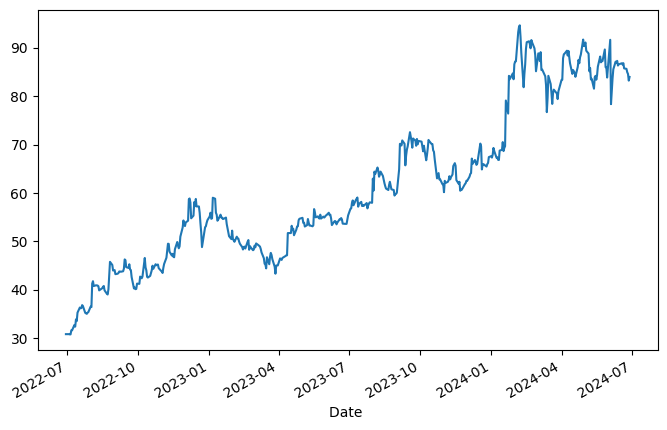

In [236]:
idbi_df['close '].plot(figsize=(8,5))
plt.show()

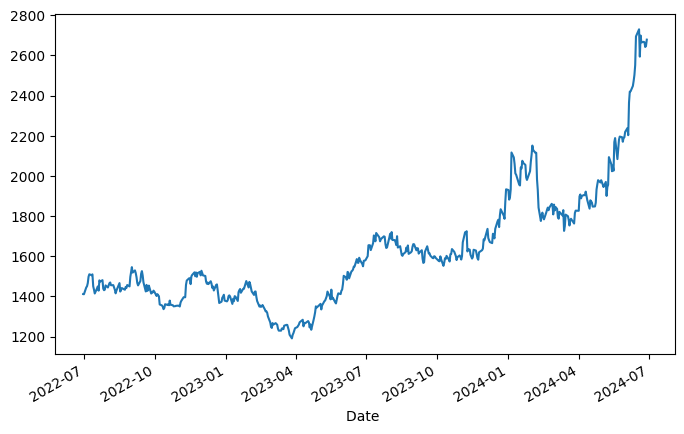

In [237]:
endurance_df['close '].plot(figsize=(8,5))
plt.show()

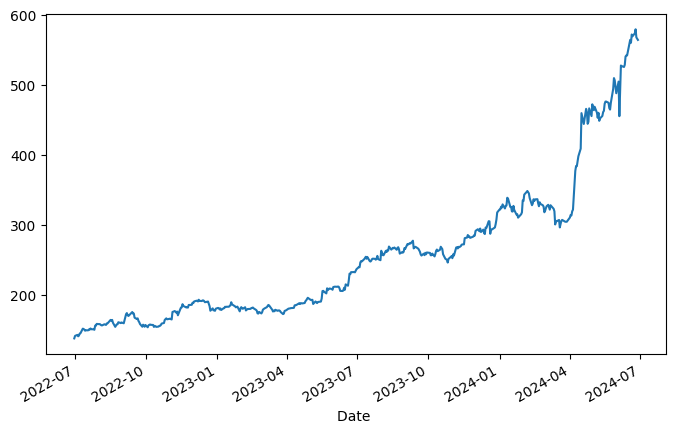

In [238]:
exide_df['close '].plot(figsize=(8,5))
plt.show()

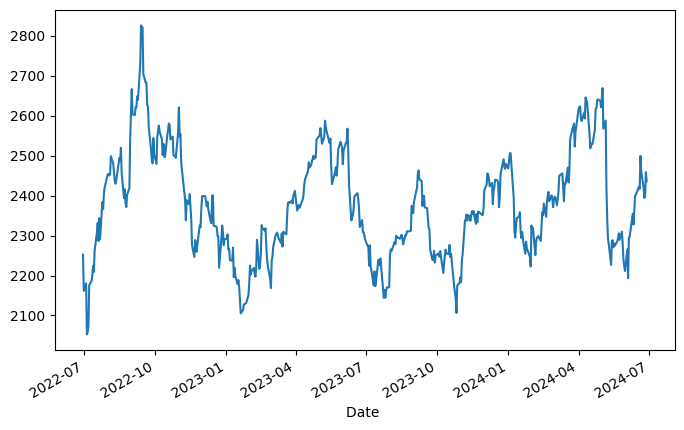

In [239]:
srf_df['close '].plot(figsize=(8,5))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

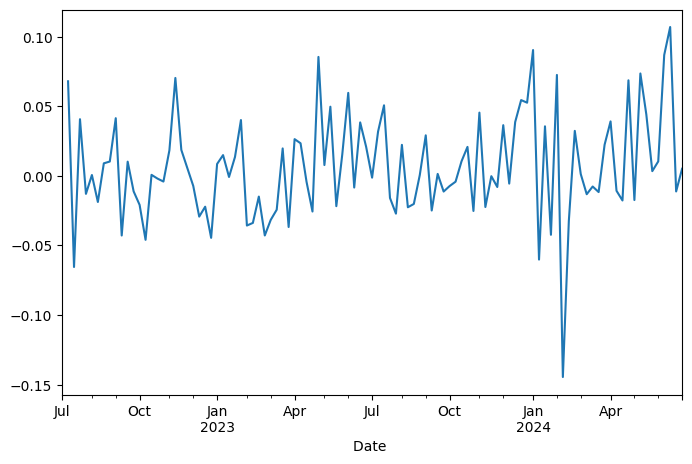

In [240]:
endurance_df_weekly_returns.plot(figsize=(8,5))
plt.show

In [241]:
exide_weight = 0.4
endurance_weight = 0.3
idbi_weight = 0.2
srf_weight = 0.1

In [242]:
daily_returns = daily_returns.dropna(axis=0)
daily_returns

,Daily Return NIFTY,Daily Return IDBI,Daily Return SRF,Daily Return EXIDE,Daily Return ENDURE
Date,,,,,
2024-06-27,0.001411,-0.008972,0.009316,0.003095,-0.011510
2024-06-26,-0.007334,0.016328,-0.024725,0.003262,-0.002231
2024-06-25,-0.006199,0.004247,-0.002066,0.020127,0.008782
2024-06-24,-0.007764,0.008206,0.010968,-0.010056,0.000900
2024-06-21,-0.001563,0.001050,0.016311,-0.007258,-0.001125
...,...,...,...,...,...
2022-07-06,-0.008910,-0.027267,-0.006607,-0.020591,-0.021451
2022-07-05,-0.011255,0.000000,-0.003162,-0.007432,-0.010970
2022-07-04,0.001548,0.001625,0.060284,0.014460,-0.004076


In [243]:
weekly_returns = weekly_returns.dropna(axis=0)
monthly_returns = monthly_returns.dropna(axis=0)

In [244]:
weekly_returns['Weekly Portfolio Return'] = np.nan
daily_returns['Daily Portfolio Returns'] = np.nan
monthly_returns['Monthly Portfolio Returns'] = np.nan

In [245]:
for i in weekly_returns.index:
    weekly_returns.loc[i,'Weekly Portfolio Return'] = weekly_returns.loc[i,'Weekly Returns IDBI']*idbi_weight + weekly_returns.loc[i,'Weekly Returns SRF']*srf_weight + weekly_returns.loc[i,'Weekly Returns EXIDE']*exide_weight + weekly_returns.loc[i,'Weekly Returns ENDURE']*endurance_weight

In [246]:
weekly_returns

,Weekly Return NIFTY,Weekly Returns IDBI,Weekly Returns SRF,Weekly Returns EXIDE,Weekly Returns ENDURE,Weekly Portfolio Return
Date,,,,,,
2022-07-10,0.029312,0.025642,0.006387,0.026175,0.068078,0.036661
2022-07-17,-0.010623,0.109308,0.038748,0.029194,-0.065459,0.017776
2022-07-24,0.040914,0.037583,0.012786,0.009324,0.040826,0.024773
2022-07-31,0.025906,-0.034750,0.058399,0.049469,-0.012874,0.014815
2022-08-07,0.013847,0.142157,0.028519,-0.013338,0.000687,0.026154
...,...,...,...,...,...,...
2024-06-02,-0.018748,-0.019092,-0.034556,0.028039,0.010488,0.007088
2024-06-09,0.033152,-0.000584,0.044640,0.076468,0.086987,0.061030
2024-06-16,0.007505,0.011968,0.038059,0.028432,0.107111,0.049705


In [247]:
for i in monthly_returns.index:
    monthly_returns.loc[i,'Monthly Portfolio Returns'] = monthly_returns.loc[i,'Monthly Returns IDBI']*idbi_weight + monthly_returns.loc[i,'Monthly Returns SRF']*srf_weight + monthly_returns.loc[i,'Monthly Returns EXIDE']*exide_weight + monthly_returns.loc[i,'Monthly Returns ENDURE']*endurance_weight

In [248]:
monthly_returns

,Monthly Returns NIFTY,Monthly Returns IDBI,Monthly Returns SRF,Monthly Returns EXIDE,Monthly Returns ENDURE,Monthly Portfolio Returns
Date,,,,,,
2022-07-31,0.083720,0.137784,0.075284,0.139951,0.030039,0.100077
2022-08-31,0.034430,0.217754,0.046310,0.012851,0.028662,0.061921
2022-09-30,-0.038161,-0.063402,-0.015832,-0.022678,-0.050062,-0.038353
2022-10-31,0.052301,0.062263,0.021810,0.054553,-0.050150,0.021410
2022-11-30,0.040590,0.196832,-0.078406,0.130472,0.120577,0.119888
2022-12-31,-0.035434,0.016698,-0.032369,-0.046608,-0.102358,-0.049248
2023-01-31,-0.024781,-0.040362,-0.048257,0.003323,0.065390,0.008048
2023-02-28,-0.020489,-0.077651,-0.006389,-0.030884,-0.164671,-0.077924
2023-03-31,0.003220,-0.070769,0.106335,0.014719,-0.005782,0.000633


In [249]:
daily_returns

,Daily Return NIFTY,Daily Return IDBI,Daily Return SRF,Daily Return EXIDE,Daily Return ENDURE,Daily Portfolio Returns
Date,,,,,,
2024-06-27,0.001411,-0.008972,0.009316,0.003095,-0.011510,NaN
2024-06-26,-0.007334,0.016328,-0.024725,0.003262,-0.002231,NaN
2024-06-25,-0.006199,0.004247,-0.002066,0.020127,0.008782,NaN
2024-06-24,-0.007764,0.008206,0.010968,-0.010056,0.000900,NaN
2024-06-21,-0.001563,0.001050,0.016311,-0.007258,-0.001125,NaN
...,...,...,...,...,...,...
2022-07-06,-0.008910,-0.027267,-0.006607,-0.020591,-0.021451,NaN
2022-07-05,-0.011255,0.000000,-0.003162,-0.007432,-0.010970,NaN
2022-07-04,0.001548,0.001625,0.060284,0.014460,-0.004076,NaN


In [250]:
for i in daily_returns.index:
    daily_returns.loc[i,'Daily Portfolio Returns'] = daily_returns.loc[i,'Daily Return IDBI']*idbi_weight + daily_returns.loc[i,'Daily Return SRF']*srf_weight + daily_returns.loc[i,'Daily Return EXIDE']*exide_weight + daily_returns.loc[i,'Daily Return ENDURE']*endurance_weight

In [251]:
daily_returns

,Daily Return NIFTY,Daily Return IDBI,Daily Return SRF,Daily Return EXIDE,Daily Return ENDURE,Daily Portfolio Returns
Date,,,,,,
2024-06-27,0.001411,-0.008972,0.009316,0.003095,-0.011510,-0.003078
2024-06-26,-0.007334,0.016328,-0.024725,0.003262,-0.002231,0.001429
2024-06-25,-0.006199,0.004247,-0.002066,0.020127,0.008782,0.011328
2024-06-24,-0.007764,0.008206,0.010968,-0.010056,0.000900,-0.001014
2024-06-21,-0.001563,0.001050,0.016311,-0.007258,-0.001125,-0.001400
...,...,...,...,...,...,...
2022-07-06,-0.008910,-0.027267,-0.006607,-0.020591,-0.021451,-0.020786
2022-07-05,-0.011255,0.000000,-0.003162,-0.007432,-0.010970,-0.006580
2022-07-04,0.001548,0.001625,0.060284,0.014460,-0.004076,0.010915


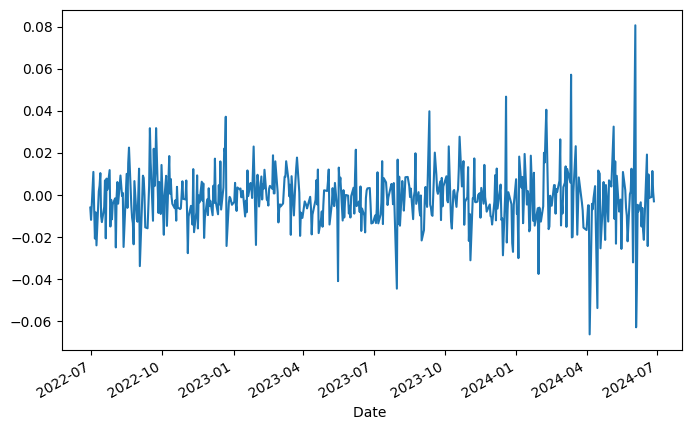

In [252]:
daily_returns['Daily Portfolio Returns'].plot(figsize=(8,5))
plt.show()

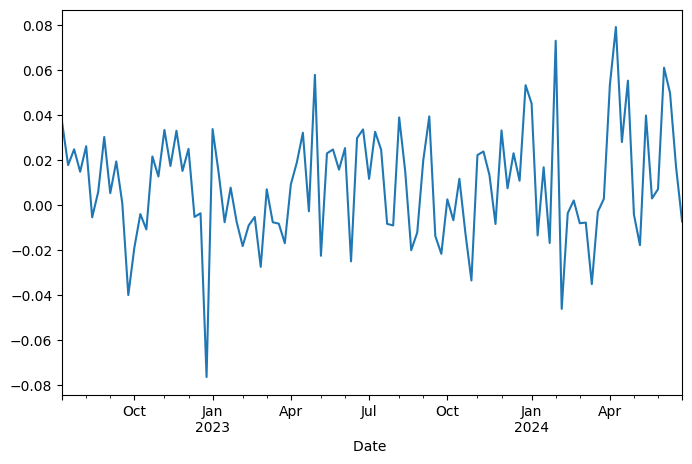

In [253]:
weekly_returns['Weekly Portfolio Return'].plot(figsize=(8,5))
plt.show()

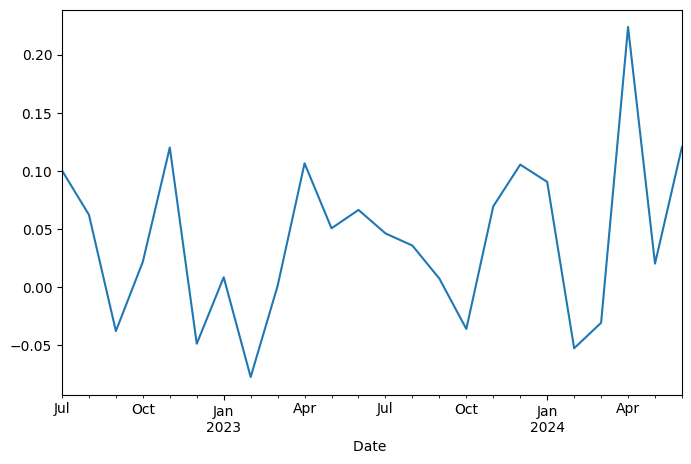

In [254]:
monthly_returns['Monthly Portfolio Returns'].plot(figsize=(8,5))
plt.show()

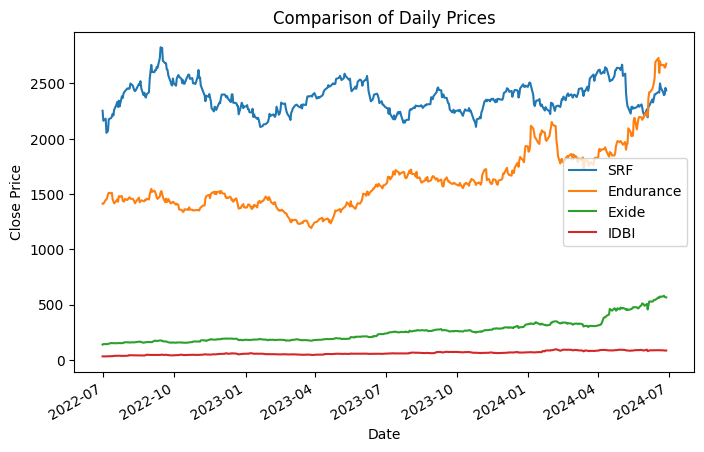

In [255]:
# Combine columns from multiple DataFrames
combined_df_close = pd.DataFrame({
    'SRF': srf_df['close '],
    'Endurance': endurance_df['close '],
    'Exide': exide_df['close '],
    'IDBI': idbi_df['close ']
})

# Plot all columns on the same graph
combined_df_close.plot(figsize=(8, 5), title="Comparison of Daily Prices")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(["SRF", "Endurance", "Exide", "IDBI"])
plt.show()

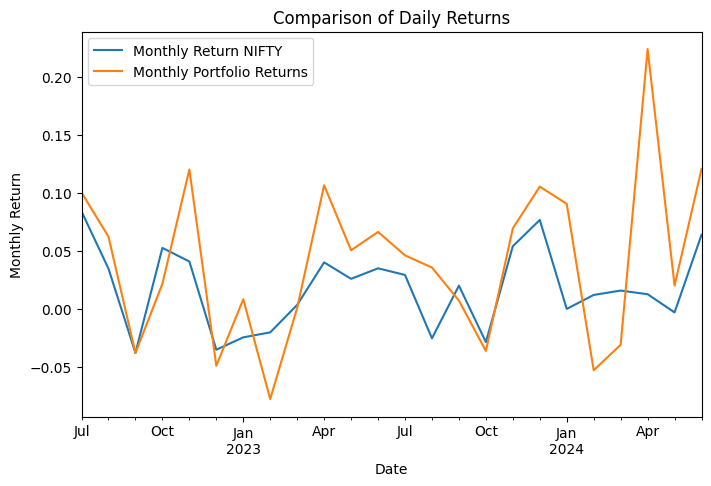

In [256]:
# Plot both columns on the same graph
monthly_returns[['Monthly Returns NIFTY', 'Monthly Portfolio Returns']].plot(figsize=(8, 5), title= "Comparison of Daily Returns")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Monthly Return")
plt.legend(["Monthly Return NIFTY", "Monthly Portfolio Returns"])  # Customize legend
plt.show()

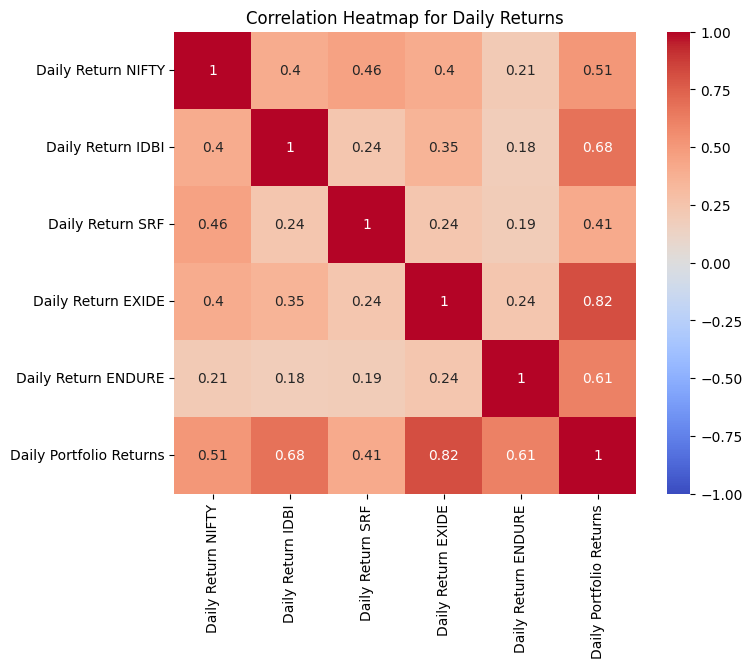

In [257]:
plt.figure(figsize=(8, 6))
sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap for Daily Returns")
plt.show()

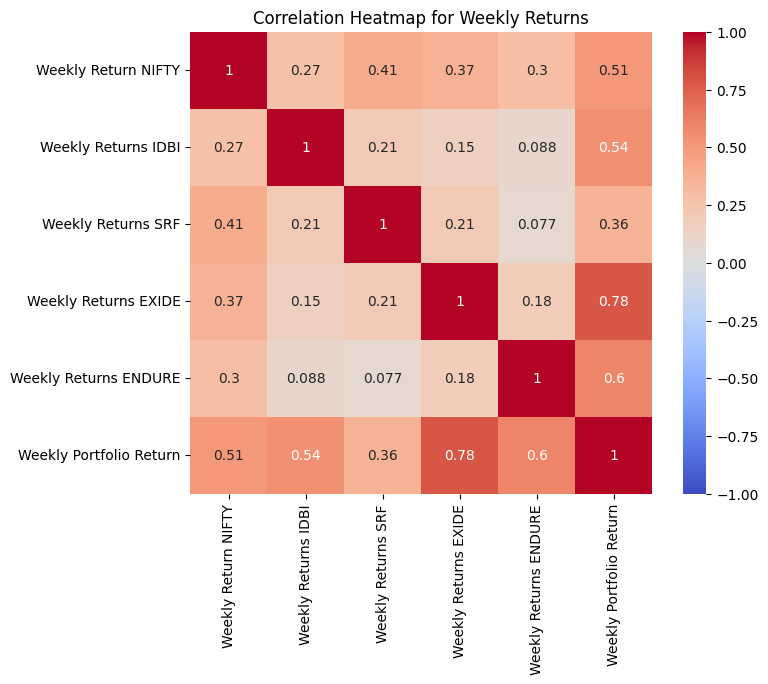

In [258]:
plt.figure(figsize=(8, 6))
sns.heatmap(weekly_returns.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap for Weekly Returns")
plt.show()

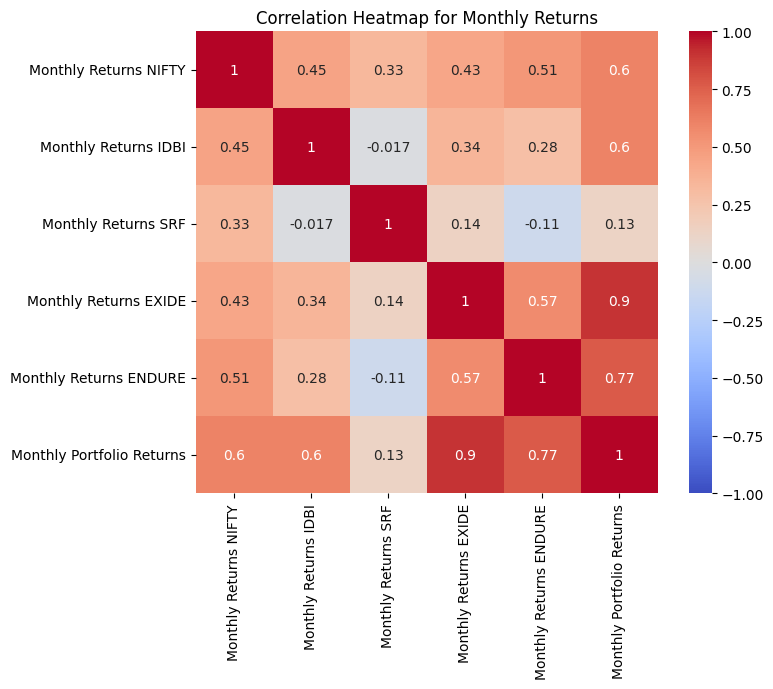

In [259]:
plt.figure(figsize=(8, 6))
sns.heatmap(monthly_returns.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap for Monthly Returns")
plt.show()

In [260]:
niftybank_df = pd.read_csv('Quote-FAO-BANKNIFTY-30-06-2023-to-30-06-2024 (1).csv')
niftybank_df.head()

,DATE,EXPIRY DATE,OPTION TYPE,STRIKE PRICE,OPEN PRICE,HIGH PRICE,LOW PRICE,CLOSE PRICE,LAST PRICE,SETTLE PRICE,Volume,VALUE,PREMIUM VALUE,OPEN INTEREST,CHANGE IN OI
0,26-Jun-24,26-Jun-24,XX,-,"52,626.85","52,990.00","52,255.55","52,894.15","52,880.50","52,870.50","22,18,515","1,17,04,52,96,724.75","1,17,04,52,96,724.75","11,14,770","-4,38,990"
1,25-Jun-24,26-Jun-24,XX,-,"51,799.95","52,718.25","51,768.80","52,626.85","52,644.35","52,626.85","25,47,780","1,33,25,03,61,069.75","1,33,25,03,61,069.75","15,53,760","-2,67,030"
2,24-Jun-24,26-Jun-24,XX,-,"51,294.70","51,864.75","51,150.00","51,751.05","51,794.70","51,751.05","23,37,210","1,20,47,49,75,670.50","1,20,47,49,75,670.50","18,20,790","-2,19,735"
3,21-Jun-24,26-Jun-24,XX,-,"51,821.00","51,821.00","51,273.50","51,613.35","51,600.00","51,613.35","26,13,975","1,34,72,91,49,742.25","1,34,72,91,49,742.25","20,40,525","-1,93,005"
4,20-Jun-24,26-Jun-24,XX,-,"51,630.90","51,800.00","51,212.00","51,755.10","51,775.00","51,755.10","23,91,045","1,23,27,56,37,256.50","1,23,27,56,37,256.50","22,33,530","-1,72,455"


In [261]:
print(niftybank_df.columns)

Index(['DATE ', 'EXPIRY DATE ', 'OPTION TYPE ', 'STRIKE PRICE ', 'OPEN PRICE ',
       'HIGH PRICE ', 'LOW PRICE ', 'CLOSE PRICE ', 'LAST PRICE ',
       'SETTLE PRICE ', 'Volume ', 'VALUE ', 'PREMIUM VALUE ',
       'OPEN INTEREST ', 'CHANGE IN OI '],
      dtype='object')


In [262]:
niftybank_df['DATE '] = pd.to_datetime(niftybank_df['DATE '])
niftybank_df.set_index('DATE ', inplace=True)

In [263]:
niftybank_df.head()

,EXPIRY DATE,OPTION TYPE,STRIKE PRICE,OPEN PRICE,HIGH PRICE,LOW PRICE,CLOSE PRICE,LAST PRICE,SETTLE PRICE,Volume,VALUE,PREMIUM VALUE,OPEN INTEREST,CHANGE IN OI
DATE,,,,,,,,,,,,,,
2024-06-26,26-Jun-24,XX,-,"52,626.85","52,990.00","52,255.55","52,894.15","52,880.50","52,870.50","22,18,515","1,17,04,52,96,724.75","1,17,04,52,96,724.75","11,14,770","-4,38,990"
2024-06-25,26-Jun-24,XX,-,"51,799.95","52,718.25","51,768.80","52,626.85","52,644.35","52,626.85","25,47,780","1,33,25,03,61,069.75","1,33,25,03,61,069.75","15,53,760","-2,67,030"
2024-06-24,26-Jun-24,XX,-,"51,294.70","51,864.75","51,150.00","51,751.05","51,794.70","51,751.05","23,37,210","1,20,47,49,75,670.50","1,20,47,49,75,670.50","18,20,790","-2,19,735"
2024-06-21,26-Jun-24,XX,-,"51,821.00","51,821.00","51,273.50","51,613.35","51,600.00","51,613.35","26,13,975","1,34,72,91,49,742.25","1,34,72,91,49,742.25","20,40,525","-1,93,005"
2024-06-20,26-Jun-24,XX,-,"51,630.90","51,800.00","51,212.00","51,755.10","51,775.00","51,755.10","23,91,045","1,23,27,56,37,256.50","1,23,27,56,37,256.50","22,33,530","-1,72,455"


In [264]:
idbi_ohr_df_1 = pd.DataFrame({'Stock': idbi_df['close '],
                              'Future': niftybank_df['CLOSE PRICE ']
                              }).dropna()

In [265]:
idbi_ohr_df_1

,Stock,Future
2023-06-30,55.35,"45,196.65"
2023-07-03,56.70,"45,612.40"
2023-07-04,56.80,"45,688.90"
2023-07-05,57.95,"45,577.25"
2023-07-06,58.45,"45,730.90"
...,...,...
2024-06-20,86.82,"51,755.10"
2024-06-21,85.74,"51,613.35"
2024-06-24,85.65,"51,751.05"
2024-06-25,84.95,"52,626.85"


In [266]:
idbi_ohr_df_1['Stock'] = idbi_ohr_df_1['Stock'].replace(',','', regex=True)
idbi_ohr_df_1['Future'] = idbi_ohr_df_1['Future'].replace(',','', regex=True)

In [267]:
idbi_ohr_df_1['Stock'] = pd.to_numeric(idbi_ohr_df_1['Stock'], errors='coerce')
idbi_ohr_df_1['Future'] = pd.to_numeric(idbi_ohr_df_1['Future'], errors='coerce')

In [268]:
idbi_ohr_df_1

,Stock,Future
2023-06-30,55.35,45196.65
2023-07-03,56.70,45612.40
2023-07-04,56.80,45688.90
2023-07-05,57.95,45577.25
2023-07-06,58.45,45730.90
...,...,...
2024-06-20,86.82,51755.10
2024-06-21,85.74,51613.35
2024-06-24,85.65,51751.05
2024-06-25,84.95,52626.85


In [269]:
idbi_ohr_df_1_weekly = idbi_ohr_df_1.resample('W').ffill()
idbi_ohr_df_1_monthly = idbi_ohr_df_1.resample('M').ffill()

In [270]:
idbi_ohr_df_1_monthly['Stock_Monthly_Return'] = idbi_ohr_df_1_monthly['Stock'].pct_change()
idbi_ohr_df_1_monthly['Futures_Monthly_Return'] = idbi_ohr_df_1_monthly['Future'].pct_change()

In [271]:
idbi_ohr_df_1_monthly

,Stock,Future,Stock_Monthly_Return,Futures_Monthly_Return
2023-06-30,55.35,45196.65,NaN,NaN
2023-07-31,57.95,46081.00,0.046974,0.019567
2023-08-31,59.80,44289.85,0.031924,-0.038870
2023-09-30,70.75,45419.05,0.183110,0.025496
2023-10-31,61.85,43316.80,-0.125795,-0.046286
2023-11-30,62.50,44732.30,0.010509,0.032678
2023-12-31,67.40,49151.75,0.078400,0.098798
2024-01-31,86.60,46636.90,0.284866,-0.051165
2024-02-29,86.45,46546.70,-0.001732,-0.001934
2024-03-31,81.00,48084.85,-0.063042,0.033045


In [272]:
idbi_ohr_df_1_weekly['Stock_Weekly_Return'] = idbi_ohr_df_1_weekly['Stock'].pct_change()
idbi_ohr_df_1_weekly['Futures_Weekly_Return'] = idbi_ohr_df_1_weekly['Future'].pct_change()

In [273]:
idbi_ohr_df_1_weekly.head()

,Stock,Future,Stock_Weekly_Return,Futures_Weekly_Return
2023-07-02,55.35,45196.65,NaN,NaN
2023-07-09,57.45,45383.85,0.037940,0.004142
2023-07-16,57.70,45297.25,0.004352,-0.001908
2023-07-23,57.45,46522.90,-0.004333,0.027058
2023-07-30,58.05,45931.75,0.010444,-0.012707


In [274]:
idbi_ohr_df_1_weekly = idbi_ohr_df_1_weekly.dropna(axis=0)

In [275]:
idbi_ohr_df_1_weekly.head()

,Stock,Future,Stock_Weekly_Return,Futures_Weekly_Return
2023-07-09,57.45,45383.85,0.037940,0.004142
2023-07-16,57.70,45297.25,0.004352,-0.001908
2023-07-23,57.45,46522.90,-0.004333,0.027058
2023-07-30,58.05,45931.75,0.010444,-0.012707
2023-08-06,63.90,45235.60,0.100775,-0.015156


In [276]:
df = idbi_ohr_df_1_weekly

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Weekly_Return', 'Futures_Weekly_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Weekly_Return']
Y = df['Futures_Weekly_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Weekly_Return']

In [277]:
print(hedge_ratio)

0.05147163834038311


In [278]:
idbi_ohr_df_1_monthly = idbi_ohr_df_1_monthly.dropna(axis=0)

In [279]:
df = idbi_ohr_df_1_monthly

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Monthly_Return', 'Futures_Monthly_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Monthly_Return']
Y = df['Futures_Monthly_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Monthly_Return']

In [280]:
print(hedge_ratio)

-0.01579477213483288


In [281]:
idbi_ohr_df_1['Stock_Daily_Return'] = idbi_ohr_df_1['Stock'].pct_change()
idbi_ohr_df_1['Futures_Daily_Return'] = idbi_ohr_df_1['Future'].pct_change()
idbi_ohr_df_1 = idbi_ohr_df_1.dropna()

In [282]:
idbi_ohr_df_1

,Stock,Future,Stock_Daily_Return,Futures_Daily_Return
2023-07-03,56.70,45612.40,0.024390,0.009199
2023-07-04,56.80,45688.90,0.001764,0.001677
2023-07-05,57.95,45577.25,0.020246,-0.002444
2023-07-06,58.45,45730.90,0.008628,0.003371
2023-07-07,57.45,45383.85,-0.017109,-0.007589
...,...,...,...,...
2024-06-20,86.82,51755.10,0.003351,0.007822
2024-06-21,85.74,51613.35,-0.012440,-0.002739
2024-06-24,85.65,51751.05,-0.001050,0.002668
2024-06-25,84.95,52626.85,-0.008173,0.016923


In [283]:
correlation = idbi_ohr_df_1['Stock_Daily_Return'].corr(idbi_ohr_df_1['Futures_Daily_Return'])
print(f"Correlation between IDBI stock and Bank Nifty futures: {correlation}")

Correlation between IDBI stock and Bank Nifty futures: 0.48432181876453534


In [284]:
df = idbi_ohr_df_1

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Daily_Return', 'Futures_Daily_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Daily_Return']
Y = df['Futures_Daily_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Daily_Return']

In [285]:
print(hedge_ratio)

0.1831771432181298


In [286]:
niftymidcap_df = pd.read_csv('Quote-FAO-MIDCPNIFTY-30-06-2023-to-30-06-2024.csv')
niftymidcap_df.head()

,DATE,EXPIRY DATE,OPTION TYPE,STRIKE PRICE,OPEN PRICE,HIGH PRICE,LOW PRICE,CLOSE PRICE,LAST PRICE,SETTLE PRICE,Volume,VALUE,PREMIUM VALUE,OPEN INTEREST,CHANGE IN OI
0,24-Jun-24,24-Jun-24,XX,-,"12,109.95","12,306.35","12,008.85","12,273.50","12,277.70","12,275.90","20,41,500","24,95,85,03,832.50","24,95,85,03,832.50","8,14,950","-3,23,400"
1,21-Jun-24,24-Jun-24,XX,-,"12,196.80","12,252.45","12,138.20","12,169.15","12,145.00","12,169.15","12,02,625","14,66,40,57,045.00","14,66,40,57,045.00","11,38,350","-3,39,675"
2,20-Jun-24,24-Jun-24,XX,-,"12,001.35","12,156.90","11,992.00","12,139.55","12,148.75","12,139.55","8,92,050","10,79,99,97,750.00","10,79,99,97,750.00","14,78,025","-2,80,275"
3,19-Jun-24,24-Jun-24,XX,-,"12,127.20","12,155.80","11,935.00","12,001.95","11,998.00","12,001.95","10,16,025","12,23,03,08,406.25","12,23,03,08,406.25","17,58,300","48,525"
4,18-Jun-24,24-Jun-24,XX,-,"12,134.95","12,135.00","12,035.00","12,113.45","12,117.00","12,113.45","3,49,650","4,22,69,51,947.50","4,22,69,51,947.50","17,09,775","-4,800"


In [287]:
niftymidcap_df['DATE '] = pd.to_datetime(niftymidcap_df['DATE '])
niftymidcap_df.set_index('DATE ', inplace=True)

In [288]:
endurance_ohr_df_1 = pd.DataFrame({'Stock': endurance_df['close '],
                              'Future': niftymidcap_df['CLOSE PRICE ']
                              }).dropna()

In [289]:
endurance_ohr_df_1['Stock'] = endurance_ohr_df_1['Stock'].replace(',','', regex=True)
endurance_ohr_df_1['Future'] = endurance_ohr_df_1['Future'].replace(',','', regex=True)

In [290]:
endurance_ohr_df_1['Stock'] = pd.to_numeric(endurance_ohr_df_1['Stock'], errors='coerce')
endurance_ohr_df_1['Future'] = pd.to_numeric(endurance_ohr_df_1['Future'], errors='coerce')

In [291]:
endurance_ohr_df_1_weekly = endurance_ohr_df_1.resample('W').ffill()
endurance_ohr_df_1_monthly = endurance_ohr_df_1.resample('M').ffill()

In [292]:
endurance_ohr_df_1_monthly['Stock_Monthly_Return'] = endurance_ohr_df_1_monthly['Stock'].pct_change()
endurance_ohr_df_1_monthly['Futures_Monthly_Return'] = endurance_ohr_df_1_monthly['Future'].pct_change()

In [293]:
endurance_ohr_df_1_weekly['Stock_Weekly_Return'] = endurance_ohr_df_1_weekly['Stock'].pct_change()
endurance_ohr_df_1_weekly['Futures_Weekly_Return'] = endurance_ohr_df_1_weekly['Future'].pct_change()

In [294]:
endurance_ohr_df_1_monthly = endurance_ohr_df_1_monthly.dropna(axis=0)
endurance_ohr_df_1_weekly = endurance_ohr_df_1_weekly.dropna(axis=0)

In [295]:
df = endurance_ohr_df_1_weekly

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Weekly_Return', 'Futures_Weekly_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Weekly_Return']
Y = df['Futures_Weekly_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Weekly_Return']
print(hedge_ratio)

0.1541037105098039


In [296]:
df = endurance_ohr_df_1_monthly

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Monthly_Return', 'Futures_Monthly_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Monthly_Return']
Y = df['Futures_Monthly_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Monthly_Return']
print(hedge_ratio)

0.2545167685194914


In [297]:
endurance_ohr_df_1['Stock_Daily_Return'] = endurance_ohr_df_1['Stock'].pct_change()
endurance_ohr_df_1['Futures_Daily_Return'] = endurance_ohr_df_1['Future'].pct_change()
endurance_ohr_df_1 = endurance_ohr_df_1.dropna()

In [298]:
correlation = endurance_ohr_df_1['Stock_Daily_Return'].corr(endurance_ohr_df_1['Futures_Daily_Return'])
print(f"Correlation between ENDURANCE stock and Bank Nifty futures: {correlation}")

Correlation between ENDURANCE stock and Bank Nifty futures: 0.24950733650050533


In [299]:
df = endurance_ohr_df_1

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Daily_Return', 'Futures_Daily_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Daily_Return']
Y = df['Futures_Daily_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Daily_Return']
print(hedge_ratio)

0.14269711417700567


In [300]:
#nifty50_df = pd.read_csv('Quote-FAO-NIFTY-30-06-2023-to-30-06-2024.csv')
#nifty50_df.head()

#nifty50_df['DATE '] = pd.to_datetime(nifty50_df['DATE '])
#nifty50_df.set_index('DATE ', inplace=True)

srf_ohr_df_1 = pd.DataFrame({'Stock': srf_df['close '],
                              'Future': niftymidcap_df['CLOSE PRICE ']
                              }).dropna()

srf_ohr_df_1['Stock'] = srf_ohr_df_1['Stock'].replace(',','', regex=True)
srf_ohr_df_1['Future'] = srf_ohr_df_1['Future'].replace(',','', regex=True)

srf_ohr_df_1['Stock'] = pd.to_numeric(srf_ohr_df_1['Stock'], errors='coerce')
srf_ohr_df_1['Future'] = pd.to_numeric(srf_ohr_df_1['Future'], errors='coerce')

srf_ohr_df_1_weekly = srf_ohr_df_1.resample('W').ffill()
srf_ohr_df_1_monthly = srf_ohr_df_1.resample('M').ffill()

srf_ohr_df_1_monthly['Stock_Monthly_Return'] = srf_ohr_df_1_monthly['Stock'].pct_change()
srf_ohr_df_1_monthly['Futures_Monthly_Return'] = srf_ohr_df_1_monthly['Future'].pct_change()

srf_ohr_df_1_weekly['Stock_Weekly_Return'] = srf_ohr_df_1_weekly['Stock'].pct_change()
srf_ohr_df_1_weekly['Futures_Weekly_Return'] = srf_ohr_df_1_weekly['Future'].pct_change()

srf_ohr_df_1_monthly = srf_ohr_df_1_monthly.dropna(axis=0)
srf_ohr_df_1_weekly = srf_ohr_df_1_weekly.dropna(axis=0)

srf_ohr_df_1['Stock_Daily_Return'] = srf_ohr_df_1['Stock'].pct_change()
srf_ohr_df_1['Futures_Daily_Return'] = srf_ohr_df_1['Future'].pct_change()
srf_ohr_df_1 = srf_ohr_df_1.dropna()

In [301]:
correlation = srf_ohr_df_1['Stock_Daily_Return'].corr(srf_ohr_df_1['Futures_Daily_Return'])
print(f"Correlation between SRF stock and Nifty MIDCAP futures: {correlation}")

Correlation between SRF stock and Nifty MIDCAP futures: 0.4536315656821676


In [302]:
df = srf_ohr_df_1_weekly

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Weekly_Return', 'Futures_Weekly_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Weekly_Return']
Y = df['Futures_Weekly_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Weekly_Return']
print(hedge_ratio)

0.35204426036769093


In [303]:
df = srf_ohr_df_1_monthly

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Monthly_Return', 'Futures_Monthly_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Monthly_Return']
Y = df['Futures_Monthly_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Monthly_Return']
print(hedge_ratio)

0.19409321327556076


In [304]:
df = srf_ohr_df_1

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Daily_Return', 'Futures_Daily_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Daily_Return']
Y = df['Futures_Daily_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Daily_Return']
print(hedge_ratio)

0.37264630368694424


In [305]:
nifty50_df = pd.read_csv('Quote-FAO-NIFTY-30-06-2023-to-30-06-2024.csv')
nifty50_df.head()

nifty50_df['DATE '] = pd.to_datetime(nifty50_df['DATE '])
nifty50_df.set_index('DATE ', inplace=True)

exide_ohr_df_1 = pd.DataFrame({'Stock': exide_df['close '],
                              'Future': niftymidcap_df['CLOSE PRICE ']
                              }).dropna()

exide_ohr_df_1['Stock'] = exide_ohr_df_1['Stock'].replace(',','', regex=True)
exide_ohr_df_1['Future'] = exide_ohr_df_1['Future'].replace(',','', regex=True)

exide_ohr_df_1['Stock'] = pd.to_numeric(exide_ohr_df_1['Stock'], errors='coerce')
exide_ohr_df_1['Future'] = pd.to_numeric(exide_ohr_df_1['Future'], errors='coerce')

exide_ohr_df_1_weekly = exide_ohr_df_1.resample('W').ffill()
exide_ohr_df_1_monthly = exide_ohr_df_1.resample('M').ffill()

exide_ohr_df_1_monthly['Stock_Monthly_Return'] = exide_ohr_df_1_monthly['Stock'].pct_change()
exide_ohr_df_1_monthly['Futures_Monthly_Return'] = exide_ohr_df_1_monthly['Future'].pct_change()

exide_ohr_df_1_weekly['Stock_Weekly_Return'] = exide_ohr_df_1_weekly['Stock'].pct_change()
exide_ohr_df_1_weekly['Futures_Weekly_Return'] = exide_ohr_df_1_weekly['Future'].pct_change()

exide_ohr_df_1_monthly = exide_ohr_df_1_monthly.dropna(axis=0)
exide_ohr_df_1_weekly = exide_ohr_df_1_weekly.dropna(axis=0)

exide_ohr_df_1['Stock_Daily_Return'] = exide_ohr_df_1['Stock'].pct_change()
exide_ohr_df_1['Futures_Daily_Return'] = exide_ohr_df_1['Future'].pct_change()
exide_ohr_df_1 = exide_ohr_df_1.dropna()

In [306]:
correlation = exide_ohr_df_1['Stock_Daily_Return'].corr(exide_ohr_df_1['Futures_Daily_Return'])
print(f"Correlation between EXIDE stock and Nifty 50 futures: {correlation}")

Correlation between EXIDE stock and Nifty 50 futures: 0.4525275657851197


In [307]:
df = exide_ohr_df_1_weekly

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Weekly_Return', 'Futures_Weekly_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Weekly_Return']
Y = df['Futures_Weekly_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Weekly_Return']
print(hedge_ratio)

0.13542527150091216


In [308]:
df = exide_ohr_df_1_monthly

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Monthly_Return', 'Futures_Monthly_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Monthly_Return']
Y = df['Futures_Monthly_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Monthly_Return']
print(hedge_ratio)

0.12430052195684343


In [309]:
df = exide_ohr_df_1

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Daily_Return', 'Futures_Daily_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Daily_Return']
Y = df['Futures_Daily_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Daily_Return']
print(hedge_ratio)

0.2285461588400694


In [310]:
banknifty2_df = pd.read_csv('Quote-FAO-BANKNIFTY-30-06-2022-to-30-06-2023 (1).csv')
banknifty2_df.head()

banknifty2_df['DATE '] = pd.to_datetime(banknifty2_df['DATE '])
banknifty2_df.set_index('DATE ', inplace=True)

idbi_df = idbi_df[~idbi_df.index.duplicated(keep='first')]
banknifty2_df = banknifty2_df[~banknifty2_df.index.duplicated(keep='first')]

idbi_ohr_df_2 = pd.DataFrame({'Stock': idbi_df['close '],
                              'Future': banknifty2_df['CLOSE PRICE ']
                              }).dropna()

idbi_ohr_df_2['Stock'] = idbi_ohr_df_2['Stock'].replace(',','', regex=True)
idbi_ohr_df_2['Future'] = idbi_ohr_df_2['Future'].replace(',','', regex=True)

idbi_ohr_df_2['Stock'] = pd.to_numeric(idbi_ohr_df_2['Stock'], errors='coerce')
idbi_ohr_df_2['Future'] = pd.to_numeric(idbi_ohr_df_2['Future'], errors='coerce')

idbi_ohr_df_2_weekly = idbi_ohr_df_2.resample('W').ffill()
idbi_ohr_df_2_monthly = idbi_ohr_df_2.resample('M').ffill()

idbi_ohr_df_2_monthly['Stock_Monthly_Return'] = idbi_ohr_df_2_monthly['Stock'].pct_change()
idbi_ohr_df_2_monthly['Futures_Monthly_Return'] = idbi_ohr_df_2_monthly['Future'].pct_change()

idbi_ohr_df_2_weekly['Stock_Weekly_Return'] = idbi_ohr_df_2_weekly['Stock'].pct_change()
idbi_ohr_df_2_weekly['Futures_Weekly_Return'] = idbi_ohr_df_2_weekly['Future'].pct_change()

idbi_ohr_df_2_monthly = idbi_ohr_df_2_monthly.dropna(axis=0)
idbi_ohr_df_2_weekly = idbi_ohr_df_2_weekly.dropna(axis=0)

idbi_ohr_df_2['Stock_Daily_Return'] = idbi_ohr_df_2['Stock'].pct_change()
idbi_ohr_df_2['Futures_Daily_Return'] = idbi_ohr_df_2['Future'].pct_change()
idbi_ohr_df_2 = idbi_ohr_df_2.dropna()

In [311]:
df = idbi_ohr_df_2_weekly

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Weekly_Return', 'Futures_Weekly_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Weekly_Return']
Y = df['Futures_Weekly_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Weekly_Return']
print(hedge_ratio)

0.10275744369374074


In [312]:
df = idbi_ohr_df_2_monthly

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Monthly_Return', 'Futures_Monthly_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Monthly_Return']
Y = df['Futures_Monthly_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Monthly_Return']
print(hedge_ratio)

0.10680339209846831


In [313]:
df = idbi_ohr_df_2

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Daily_Return', 'Futures_Daily_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Daily_Return']
Y = df['Futures_Daily_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Daily_Return']
print(hedge_ratio)

0.15377772194480413


In [314]:
niftymidcap2_df = pd.read_csv('Quote-FAO-MIDCPNIFTY-30-06-2022-to-30-06-2023.csv')
niftymidcap2_df.head()

niftymidcap2_df['DATE '] = pd.to_datetime(niftymidcap2_df['DATE '])
niftymidcap2_df.set_index('DATE ', inplace=True)

endurance_df = endurance_df[~endurance_df.index.duplicated(keep='first')]
niftymidcap2_df = niftymidcap2_df[~niftymidcap2_df.index.duplicated(keep='first')]

endurance_ohr_df_2 = pd.DataFrame({'Stock': endurance_df['close '],
                              'Future': niftymidcap2_df['CLOSE PRICE ']
                              }).dropna()

endurance_ohr_df_2['Stock'] = endurance_ohr_df_2['Stock'].replace(',','', regex=True)
endurance_ohr_df_2['Future'] = endurance_ohr_df_2['Future'].replace(',','', regex=True)

endurance_ohr_df_2['Stock'] = pd.to_numeric(endurance_ohr_df_2['Stock'], errors='coerce')
endurance_ohr_df_2['Future'] = pd.to_numeric(endurance_ohr_df_2['Future'], errors='coerce')

endurance_ohr_df_2_weekly = endurance_ohr_df_2.resample('W').ffill()
endurance_ohr_df_2_monthly = endurance_ohr_df_2.resample('M').ffill()

endurance_ohr_df_2_monthly['Stock_Monthly_Return'] = endurance_ohr_df_2_monthly['Stock'].pct_change()
endurance_ohr_df_2_monthly['Futures_Monthly_Return'] = endurance_ohr_df_2_monthly['Future'].pct_change()

endurance_ohr_df_2_weekly['Stock_Weekly_Return'] = endurance_ohr_df_2_weekly['Stock'].pct_change()
endurance_ohr_df_2_weekly['Futures_Weekly_Return'] = endurance_ohr_df_2_weekly['Future'].pct_change()

endurance_ohr_df_2_monthly = endurance_ohr_df_2_monthly.dropna(axis=0)
endurance_ohr_df_2_weekly = endurance_ohr_df_2_weekly.dropna(axis=0)

endurance_ohr_df_2['Stock_Daily_Return'] = endurance_ohr_df_2['Stock'].pct_change()
endurance_ohr_df_2['Futures_Daily_Return'] = endurance_ohr_df_2['Future'].pct_change()
endurance_ohr_df_2 = endurance_ohr_df_2.dropna()

In [315]:
df = endurance_ohr_df_2_weekly

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Weekly_Return', 'Futures_Weekly_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Weekly_Return']
Y = df['Futures_Weekly_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Weekly_Return']
print(hedge_ratio)

0.18399738386763795


In [316]:
df = endurance_ohr_df_2_monthly

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Monthly_Return', 'Futures_Monthly_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Monthly_Return']
Y = df['Futures_Monthly_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Monthly_Return']
print(hedge_ratio)

0.30422791954333395


In [317]:
df = endurance_ohr_df_2

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Daily_Return', 'Futures_Daily_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Daily_Return']
Y = df['Futures_Daily_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Daily_Return']
print(hedge_ratio)

0.11225266590278349


In [318]:
srf_ohr_df_2 = pd.DataFrame({'Stock': srf_df['close '],
                              'Future': niftymidcap2_df['CLOSE PRICE ']
                              }).dropna()

srf_ohr_df_2['Stock'] = srf_ohr_df_2['Stock'].replace(',','', regex=True)
srf_ohr_df_2['Future'] = srf_ohr_df_2['Future'].replace(',','', regex=True)

srf_ohr_df_2['Stock'] = pd.to_numeric(srf_ohr_df_2['Stock'], errors='coerce')
srf_ohr_df_2['Future'] = pd.to_numeric(srf_ohr_df_2['Future'], errors='coerce')

srf_ohr_df_2_weekly = srf_ohr_df_2.resample('W').ffill()
srf_ohr_df_2_monthly = srf_ohr_df_2.resample('M').ffill()

srf_ohr_df_2_monthly['Stock_Monthly_Return'] = srf_ohr_df_2_monthly['Stock'].pct_change()
srf_ohr_df_2_monthly['Futures_Monthly_Return'] = srf_ohr_df_2_monthly['Future'].pct_change()

srf_ohr_df_2_weekly['Stock_Weekly_Return'] = srf_ohr_df_2_weekly['Stock'].pct_change()
srf_ohr_df_2_weekly['Futures_Weekly_Return'] = srf_ohr_df_2_weekly['Future'].pct_change()

srf_ohr_df_2_monthly = srf_ohr_df_2_monthly.dropna(axis=0)
srf_ohr_df_2_weekly = srf_ohr_df_2_weekly.dropna(axis=0)

srf_ohr_df_2['Stock_Daily_Return'] = srf_ohr_df_2['Stock'].pct_change()
srf_ohr_df_2['Futures_Daily_Return'] = srf_ohr_df_2['Future'].pct_change()
srf_ohr_df_2 = srf_ohr_df_2.dropna()

In [319]:
df = srf_ohr_df_2_weekly

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Weekly_Return', 'Futures_Weekly_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Weekly_Return']
Y = df['Futures_Weekly_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Weekly_Return']
print(hedge_ratio)

0.1419214800064201


In [320]:
df = srf_ohr_df_2_monthly

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Monthly_Return', 'Futures_Monthly_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Monthly_Return']
Y = df['Futures_Monthly_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Monthly_Return']
print(hedge_ratio)

0.04212781211334843


In [321]:
df = srf_ohr_df_2

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Daily_Return', 'Futures_Daily_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Daily_Return']
Y = df['Futures_Daily_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Daily_Return']
print(hedge_ratio)

0.13363978847660632


In [322]:
nifty2_df = pd.read_csv('Quote-FAO-MIDCPNIFTY-30-06-2022-to-30-06-2023.csv')
nifty2_df.head()

nifty2_df['DATE '] = pd.to_datetime(nifty2_df['DATE '])
nifty2_df.set_index('DATE ', inplace=True)

exide_df = exide_df[~exide_df.index.duplicated(keep='first')]
nifty2_df = nifty2_df[~nifty2_df.index.duplicated(keep='first')]

exide_ohr_df_2 = pd.DataFrame({'Stock': exide_df['close '],
                              'Future': nifty2_df['CLOSE PRICE ']
                              }).dropna()

exide_ohr_df_2['Stock'] = exide_ohr_df_2['Stock'].replace(',','', regex=True)
exide_ohr_df_2['Future'] = exide_ohr_df_2['Future'].replace(',','', regex=True)

exide_ohr_df_2['Stock'] = pd.to_numeric(exide_ohr_df_2['Stock'], errors='coerce')
exide_ohr_df_2['Future'] = pd.to_numeric(exide_ohr_df_2['Future'], errors='coerce')

exide_ohr_df_2_weekly = exide_ohr_df_2.resample('W').ffill()
exide_ohr_df_2_monthly = exide_ohr_df_2.resample('M').ffill()

exide_ohr_df_2_monthly['Stock_Monthly_Return'] = exide_ohr_df_2_monthly['Stock'].pct_change()
exide_ohr_df_2_monthly['Futures_Monthly_Return'] = exide_ohr_df_2_monthly['Future'].pct_change()

exide_ohr_df_2_weekly['Stock_Weekly_Return'] = exide_ohr_df_2_weekly['Stock'].pct_change()
exide_ohr_df_2_weekly['Futures_Weekly_Return'] = exide_ohr_df_2_weekly['Future'].pct_change()

exide_ohr_df_2_monthly = exide_ohr_df_2_monthly.dropna(axis=0)
exide_ohr_df_2_weekly = exide_ohr_df_2_weekly.dropna(axis=0)

exide_ohr_df_2['Stock_Daily_Return'] = exide_ohr_df_2['Stock'].pct_change()
exide_ohr_df_2['Futures_Daily_Return'] = exide_ohr_df_2['Future'].pct_change()
exide_ohr_df_2 = exide_ohr_df_2.dropna()

In [323]:
df = exide_ohr_df_2_weekly

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Weekly_Return', 'Futures_Weekly_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Weekly_Return']
Y = df['Futures_Weekly_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Weekly_Return']
print(hedge_ratio)

0.09732898020318487


In [324]:
df = exide_ohr_df_2_monthly

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Monthly_Return', 'Futures_Monthly_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Monthly_Return']
Y = df['Futures_Monthly_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Monthly_Return']
print(hedge_ratio)

0.1814392488727101


In [325]:
df = exide_ohr_df_2

# Drop rows with NaN values in return columns, if any
df = df.dropna(subset=['Stock_Daily_Return', 'Futures_Daily_Return'])

# Define the independent (stock returns) and dependent (futures returns) variables
X = df['Stock_Daily_Return']
Y = df['Futures_Daily_Return']

# Add a constant to the independent variable for OLS regression
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(Y, X).fit()

# Optimal hedge ratio is the slope coefficient
hedge_ratio = model.params['Stock_Daily_Return']
print(hedge_ratio)

0.17625438229097906


In [326]:
print(srf_weight)
print(idbi_weight)
print(endurance_weight)
print(exide_weight)

0.1
0.2
0.3
0.4


In [327]:
portfolio_amount = 100000000

In [328]:
hedge_data = {
    'Stock': ['IDBI', 'ENDURANCE', 'SRF', 'EXIDE'],
    'OHR': [0.183, 0.143, 0.373, 0.23],  # OHRs
    'Position_Value': [portfolio_amount*idbi_weight, portfolio_amount*endurance_weight, 
                       portfolio_amount*srf_weight, portfolio_amount*exide_weight],  # Example values in currency
    'Futures_Price': [53119, 12340.10, 12340.10, 24440.00],  # Futures prices
    'Contract_Size': [15, 25, 25, 25]  # Contract sizes
}

# Convert to DataFrame
df = pd.DataFrame(hedge_data)

# Calculate value of one futures contract
df['Futures_Contract_Value'] = df['Futures_Price'] * df['Contract_Size']

# Calculate optimal contracts
df['Optimal_Contracts'] = (df['OHR'] * df['Position_Value']) / df['Futures_Contract_Value']

# Display results
print(df[['Stock', 'Optimal_Contracts']])


       Stock  Optimal_Contracts
0       IDBI           4.593460
1  ENDURANCE          13.905884
2        SRF          12.090664
3      EXIDE          15.057283


In [329]:
hedge_data = {
    'Stock': ['IDBI', 'ENDURANCE', 'SRF', 'EXIDE'],
    'OHR': [0.0515, 0.154, 0.352, 0.135],  # OHRs
    'Position_Value': [portfolio_amount*idbi_weight, portfolio_amount*endurance_weight, 
                       portfolio_amount*srf_weight, portfolio_amount*exide_weight],  # Example values in currency
    'Futures_Price': [53119, 12340.10, 12340.10, 24440.00],  # Futures prices
    'Contract_Size': [15, 25, 25, 25]  # Contract sizes
}

# Convert to DataFrame
df = pd.DataFrame(hedge_data)

# Calculate value of one futures contract
df['Futures_Contract_Value'] = df['Futures_Price'] * df['Contract_Size']

# Calculate optimal contracts
df['Optimal_Contracts'] = (df['OHR'] * df['Position_Value']) / df['Futures_Contract_Value']

# Display results
print(df[['Stock', 'Optimal_Contracts']])

       Stock  Optimal_Contracts
0       IDBI           1.292695
1  ENDURANCE          14.975567
2        SRF          11.409956
3      EXIDE           8.837971


In [330]:
hedge_data = {
    'Stock': ['IDBI', 'ENDURANCE', 'SRF', 'EXIDE'],
    'OHR': [-0.016, 0.254, 0.194, 0.124],  # OHRs
    'Position_Value': [portfolio_amount*idbi_weight, portfolio_amount*endurance_weight, 
                       portfolio_amount*srf_weight, portfolio_amount*exide_weight],  # Example values in currency
    'Futures_Price': [53119, 12340.10, 12340.10, 24440.00],  # Futures prices
    'Contract_Size': [15, 25, 25, 25]  # Contract sizes
}

# Convert to DataFrame
df = pd.DataFrame(hedge_data)

# Calculate value of one futures contract
df['Futures_Contract_Value'] = df['Futures_Price'] * df['Contract_Size']

# Calculate optimal contracts
df['Optimal_Contracts'] = (df['OHR'] * df['Position_Value']) / df['Futures_Contract_Value']

# Display results
print(df[['Stock', 'Optimal_Contracts']])

       Stock  Optimal_Contracts
0       IDBI          -0.401614
1  ENDURANCE          24.699962
2        SRF           6.288442
3      EXIDE           8.117840


In [331]:
hedge_data = {
    'Stock': ['IDBI', 'ENDURANCE', 'SRF', 'EXIDE'],
    'OHR': [0.154, 0.112, 0.134, 0.176],  # OHRs
    'Position_Value': [portfolio_amount*idbi_weight, portfolio_amount*endurance_weight, 
                       portfolio_amount*srf_weight, portfolio_amount*exide_weight],  # Example values in currency
    'Futures_Price': [53119, 12340.10, 12340.10, 24440.00],  # Futures prices
    'Contract_Size': [15, 25, 25, 25]  # Contract sizes
}

# Convert to DataFrame
df = pd.DataFrame(hedge_data)

# Calculate value of one futures contract
df['Futures_Contract_Value'] = df['Futures_Price'] * df['Contract_Size']

# Calculate optimal contracts
df['Optimal_Contracts'] = (df['OHR'] * df['Position_Value']) / df['Futures_Contract_Value']

# Display results
print(df[['Stock', 'Optimal_Contracts']])

       Stock  Optimal_Contracts
0       IDBI           3.865535
1  ENDURANCE          10.891322
2        SRF           4.343563
3      EXIDE          11.522095


In [332]:
hedge_data = {
    'Stock': ['IDBI', 'ENDURANCE', 'SRF', 'EXIDE'],
    'OHR': [0.103, 0.184, 0.142, 0.0973],  # OHRs
    'Position_Value': [portfolio_amount*idbi_weight, portfolio_amount*endurance_weight, 
                       portfolio_amount*srf_weight, portfolio_amount*exide_weight],  
    'Futures_Price': [53119, 12340.10, 12340.10, 24440.00],  # Futures prices
    'Contract_Size': [15, 25, 25, 25]  # Contract sizes
}

# Convert to DataFrame
df = pd.DataFrame(hedge_data)

# Calculate value of one futures contract
df['Futures_Contract_Value'] = df['Futures_Price'] * df['Contract_Size']

# Calculate optimal contracts
df['Optimal_Contracts'] = (df['OHR'] * df['Position_Value']) / df['Futures_Contract_Value']

# Display results
print(df[['Stock', 'Optimal_Contracts']])

       Stock  Optimal_Contracts
0       IDBI           2.585390
1  ENDURANCE          17.892886
2        SRF           4.602880
3      EXIDE           6.369885


In [333]:
hedge_data = {
    'Stock': ['IDBI', 'ENDURANCE', 'SRF', 'EXIDE'],
    'OHR': [0.107, 0.304, 0.042, 0.181],  # OHRs
    'Position_Value': [portfolio_amount*idbi_weight, portfolio_amount*endurance_weight, 
                       portfolio_amount*srf_weight, portfolio_amount*exide_weight],  # Example values in currency
    'Futures_Price': [53119, 12340.10, 12340.10, 24440.00],  # Futures prices
    'Contract_Size': [15, 25, 25, 25]  # Contract sizes
}

# Convert to DataFrame
df = pd.DataFrame(hedge_data)

# Calculate value of one futures contract
df['Futures_Contract_Value'] = df['Futures_Price'] * df['Contract_Size']

# Calculate optimal contracts
df['Optimal_Contracts'] = (df['OHR'] * df['Position_Value']) / df['Futures_Contract_Value']

# Display results
print(df[['Stock', 'Optimal_Contracts']])

       Stock  Optimal_Contracts
0       IDBI           2.685794
1  ENDURANCE          29.562159
2        SRF           1.361415
3      EXIDE          11.849427


In [334]:
daily_returns

,Daily Return NIFTY,Daily Return IDBI,Daily Return SRF,Daily Return EXIDE,Daily Return ENDURE,Daily Portfolio Returns
Date,,,,,,
2024-06-27,0.001411,-0.008972,0.009316,0.003095,-0.011510,-0.003078
2024-06-26,-0.007334,0.016328,-0.024725,0.003262,-0.002231,0.001429
2024-06-25,-0.006199,0.004247,-0.002066,0.020127,0.008782,0.011328
2024-06-24,-0.007764,0.008206,0.010968,-0.010056,0.000900,-0.001014
2024-06-21,-0.001563,0.001050,0.016311,-0.007258,-0.001125,-0.001400
...,...,...,...,...,...,...
2022-07-06,-0.008910,-0.027267,-0.006607,-0.020591,-0.021451,-0.020786
2022-07-05,-0.011255,0.000000,-0.003162,-0.007432,-0.010970,-0.006580
2022-07-04,0.001548,0.001625,0.060284,0.014460,-0.004076,0.010915


In [335]:
portfolio_data = daily_returns['Daily Portfolio Returns']
nifty_data = daily_returns['Daily Return NIFTY']

In [336]:
data = pd.merge(portfolio_data, nifty_data, on='Date ')

In [337]:
data

,Daily Portfolio Returns,Daily Return NIFTY
Date,,
2024-06-27,-0.003078,0.001411
2024-06-26,0.001429,-0.007334
2024-06-25,0.011328,-0.006199
2024-06-24,-0.001014,-0.007764
2024-06-21,-0.001400,-0.001563
...,...,...
2022-07-06,-0.020786,-0.008910
2022-07-05,-0.006580,-0.011255
2022-07-04,0.010915,0.001548


In [338]:
data.to_csv('Portfolio and Index Returns.csv', index=True)

In [339]:
df = pd.read_excel("12 Month Treasury Bill Rate .xlsx")

In [340]:
df.head()

,Date,Time,Tenor,Rate(%)
0,2024-09-30,17:30:00,12 Months,6.55
1,2024-09-27,17:30:00,12 Months,6.56
2,2024-09-26,17:30:00,12 Months,6.55
3,2024-09-25,17:30:00,12 Months,6.54
4,2024-09-24,17:30:00,12 Months,6.55


In [341]:
df['T-Bill Rate'] = df['Rate(%)']/100

In [342]:
df.head()

,Date,Time,Tenor,Rate(%),T-Bill Rate
0,2024-09-30,17:30:00,12 Months,6.55,0.0655
1,2024-09-27,17:30:00,12 Months,6.56,0.0656
2,2024-09-26,17:30:00,12 Months,6.55,0.0655
3,2024-09-25,17:30:00,12 Months,6.54,0.0654
4,2024-09-24,17:30:00,12 Months,6.55,0.0655


In [343]:
daily_rf_rate = df['T-Bill Rate'].mean()/252

In [344]:
data

,Daily Portfolio Returns,Daily Return NIFTY
Date,,
2024-06-27,-0.003078,0.001411
2024-06-26,0.001429,-0.007334
2024-06-25,0.011328,-0.006199
2024-06-24,-0.001014,-0.007764
2024-06-21,-0.001400,-0.001563
...,...,...
2022-07-06,-0.020786,-0.008910
2022-07-05,-0.006580,-0.011255
2022-07-04,0.010915,0.001548


In [345]:
# Calculate excess returns
data['Portfolio_Excess_Return'] = data['Daily Portfolio Returns'] - daily_rf_rate
data['Market_Excess_Return'] = data['Daily Return NIFTY'] - daily_rf_rate

# Perform CAPM regression (Portfolio Excess Return ~ Market Excess Return)
X = sm.add_constant(data['Market_Excess_Return'])  # Adds a constant term to the predictor
y = data['Portfolio_Excess_Return']
capm_model = sm.OLS(y, X).fit()

# Print out the regression results
print(capm_model.summary())

# Portfolio beta is the coefficient of the 'Market_Excess_Return'
portfolio_beta = capm_model.params['Market_Excess_Return']
print(f"Portfolio Beta: {portfolio_beta}")

                               OLS Regression Results                              
Dep. Variable:     Portfolio_Excess_Return   R-squared:                       0.262
Model:                                 OLS   Adj. R-squared:                  0.260
Method:                      Least Squares   F-statistic:                     174.5
Date:                     Mon, 18 Nov 2024   Prob (F-statistic):           2.56e-34
Time:                             22:10:48   Log-Likelihood:                 1489.2
No. Observations:                      494   AIC:                            -2974.
Df Residuals:                          492   BIC:                            -2966.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [346]:
data

,Daily Portfolio Returns,Daily Return NIFTY,Portfolio_Excess_Return,Market_Excess_Return
Date,,,,
2024-06-27,-0.003078,0.001411,-0.003350,0.001138
2024-06-26,0.001429,-0.007334,0.001156,-0.007607
2024-06-25,0.011328,-0.006199,0.011055,-0.006471
2024-06-24,-0.001014,-0.007764,-0.001287,-0.008036
2024-06-21,-0.001400,-0.001563,-0.001672,-0.001835
...,...,...,...,...
2022-07-06,-0.020786,-0.008910,-0.021058,-0.009182
2022-07-05,-0.006580,-0.011255,-0.006853,-0.011527
2022-07-04,0.010915,0.001548,0.010642,0.001276


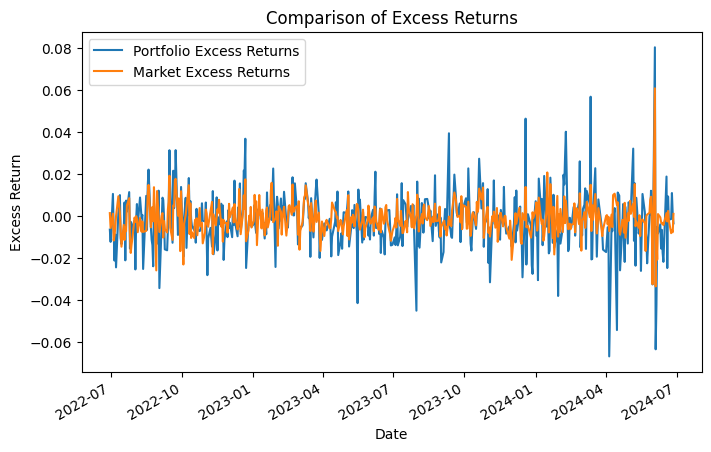

In [347]:
# Plot both columns on the same graph
data[['Portfolio_Excess_Return', 'Market_Excess_Return']].plot(figsize=(8, 5), title= "Comparison of Excess Returns")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Excess Return")
plt.legend(['Portfolio Excess Returns', 'Market Excess Returns'])  # Customize legend
plt.show()

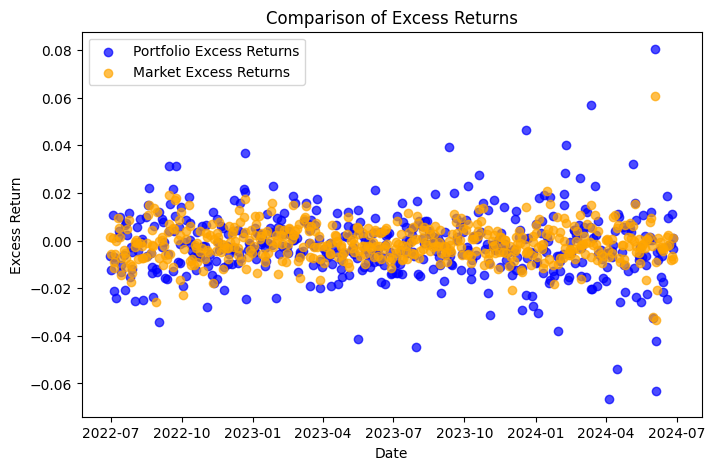

In [348]:
# Create a scatter plot
plt.figure(figsize=(8, 5))

# Plot Portfolio Excess Returns
plt.scatter(data.index, data['Portfolio_Excess_Return'], color='blue', alpha=0.7, label='Portfolio Excess Returns')

# Plot Market Excess Returns
plt.scatter(data.index, data['Market_Excess_Return'], color='orange', alpha=0.7, label='Market Excess Returns')

# Add labels and title
plt.title("Comparison of Excess Returns")
plt.xlabel("Date")
plt.ylabel("Excess Return")

# Add legend
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [349]:
portfolio_value = 100000000  
nifty_index_futures = 24141.95 
contract_multiplier = 25
beta = portfolio_beta      

# Calculate the value of one futures contract
futures_contract_value = nifty_index_futures * contract_multiplier

# Calculate the optimal number of contracts
optimal_contracts = (beta * portfolio_value) / futures_contract_value

# Print the result
print(f"Optimal Number of Futures Contracts for Hedging: {optimal_contracts:.2f}")

Optimal Number of Futures Contracts for Hedging: 151.60


In [350]:
daily_returns

,Daily Return NIFTY,Daily Return IDBI,Daily Return SRF,Daily Return EXIDE,Daily Return ENDURE,Daily Portfolio Returns
Date,,,,,,
2024-06-27,0.001411,-0.008972,0.009316,0.003095,-0.011510,-0.003078
2024-06-26,-0.007334,0.016328,-0.024725,0.003262,-0.002231,0.001429
2024-06-25,-0.006199,0.004247,-0.002066,0.020127,0.008782,0.011328
2024-06-24,-0.007764,0.008206,0.010968,-0.010056,0.000900,-0.001014
2024-06-21,-0.001563,0.001050,0.016311,-0.007258,-0.001125,-0.001400
...,...,...,...,...,...,...
2022-07-06,-0.008910,-0.027267,-0.006607,-0.020591,-0.021451,-0.020786
2022-07-05,-0.011255,0.000000,-0.003162,-0.007432,-0.010970,-0.006580
2022-07-04,0.001548,0.001625,0.060284,0.014460,-0.004076,0.010915


In [351]:
average_daily_returns = daily_returns['Daily Portfolio Returns'].mean()
print(average_daily_returns)

-0.0019526119596163995


In [352]:
initial_portfolio_value = 100000000  # Portfolio value at the start date, e.g., 1st July 2024
number_of_days = 60                # Number of trading days between 1st July 2024 and 25th Sept 2024

# Calculate the final portfolio value
final_portfolio_value = initial_portfolio_value * (1 + average_daily_returns) ** number_of_days

# Display the result
print(f"Final Portfolio Value: INR {final_portfolio_value:.2f}")

Final Portfolio Value: INR 88934392.81


In [353]:
initial_portfolio_value = 100000000  # Portfolio value on 1st July 2024 in INR
final_portfolio_value = 88934392.81    # Portfolio value on 25th September 2024 in INR
index_futures_entry_price = 24141.95          
index_futures_exit_price = 26004.15           
optimal_contracts = 151              # Optimal number of futures contracts calculated previously
contract_multiplier = 25          # Standard contract size for NIFTY futures

# Calculate portfolio profit/loss
portfolio_profit = final_portfolio_value - initial_portfolio_value

# Calculate futures profit/loss
futures_profit = optimal_contracts * contract_multiplier * (index_futures_exit_price - index_futures_entry_price)

# Calculate total profit/loss
total_hedged_profit = portfolio_profit + futures_profit

# Display the results
print(f"Portfolio Profit/Loss: INR {portfolio_profit}")
print(f"Futures Profit/Loss: INR {futures_profit}")
print(f"Total Hedged Profit/Loss: INR {total_hedged_profit}")

# Evaluate hedge effectiveness
if total_hedged_profit >= 0:
    print("The hedge was effective in protecting the portfolio value.")
else:
    print("The hedge was not effective in protecting the portfolio value.")

Portfolio Profit/Loss: INR -11065607.189999998
Futures Profit/Loss: INR 7029805.000000003
Total Hedged Profit/Loss: INR -4035802.189999995
The hedge was not effective in protecting the portfolio value.


In [354]:
initial_portfolio_value = 100000000  # Initial portfolio value in INR
stocks = ['Stock1', 'Stock2', 'Stock3', 'Stock4']  # List of stocks
initial_prices = {'Stock1': 84.39, 'Stock2': 2705.1, 'Stock3': 2462.40, 'Stock4': 569.40}  # July 1, 2024 prices
final_prices = {'Stock1': 89.05, 'Stock2': 2411.55, 'Stock3': 2451.75, 'Stock4': 473.70}  # Sept 25, 2024 prices
hedge_ratios = {'Stock1': 0.154, 'Stock2': 0.112, 'Stock3': 0.134, 'Stock4': 0.176}  # Example hedge ratios (betas)
shares_held = {'Stock1': 100000000*idbi_weight/84.39, 'Stock2': 100000000*endurance_weight/2705.1, 'Stock3': 100000000*srf_weight/2462.40, 'Stock4': 100000000*exide_weight/569.40}  # Shares held of each stock

futures_entry_prices = {'Stock1': 52574, 'Stock2': 15840, 'Stock3': 15840, 'Stock4': 24141}  # Futures prices on entry date for each stock
futures_exit_prices = {'Stock1': 54101, 'Stock2': 16913, 'Stock3': 16913, 'Stock4': 26004}   # Futures prices on exit date for each stock
futures_contract_sizes = {'Stock1': 15, 'Stock2': 25, 'Stock3': 25, 'Stock4': 25}  # Contract sizes for each futures contract

# Calculate Stock Profits
stock_profits = {stock: (final_prices[stock] - initial_prices[stock]) * shares_held[stock] for stock in stocks}

# Calculate Hedge Profits
change_in_future_prices = {stock: futures_exit_prices[stock] - futures_entry_prices[stock] for stock in stocks}
hedge_profits = {stock: hedge_ratios[stock]*change_in_future_prices[stock]/futures_contract_sizes[stock]*shares_held[stock] for stock in stocks}

# Calculate Overall Profit for each stock
overall_profits = {stock: stock_profits[stock] + hedge_profits[stock] for stock in stocks}

# Summing up for portfolio values
portfolio_stock_profit = sum(stock_profits.values())
portfolio_hedge_profit = sum(hedge_profits.values())
overall_portfolio_profit = portfolio_stock_profit + portfolio_hedge_profit

# Display the results
print("Stock Profits:", stock_profits)
print("Hedge Profits:", hedge_profits)
print("Overall Profits per Stock:", overall_profits)
print("Portfolio Stock Profit:", portfolio_stock_profit)
print("Portfolio Hedge Profit:", portfolio_hedge_profit)
print("Overall Portfolio Profit:", overall_portfolio_profit)

Stock Profits: {'Stock1': 1104396.2554805065, 'Stock2': -3255517.356105132, 'Stock3': -43250.48732943507, 'Stock4': -6722866.17492097}
Hedge Profits: {'Stock1': 3715416.5185448513, 'Stock2': 53310.85726960187, 'Stock3': 23356.400259909035, 'Stock4': 921357.2181243415}
Overall Profits per Stock: {'Stock1': 4819812.774025358, 'Stock2': -3202206.49883553, 'Stock3': -19894.087069526035, 'Stock4': -5801508.956796628}
Portfolio Stock Profit: -8917237.76287503
Portfolio Hedge Profit: 4713440.994198704
Overall Portfolio Profit: -4203796.768676326


In [355]:
idbi_df_current = pd.read_csv('Quote-Equity-IDBI-EQ-01-07-2024-to-30-09-2024.csv')
idbi_df_current['Date '] = pd.to_datetime(idbi_df_current['Date '])
idbi_df_current.set_index('Date ', inplace=True) 

In [356]:
idbi_df_current.head()

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2024-09-30,EQ,88.64,88.64,87.00,88.64,87.13,87.19,87.38,107.9,59.5,"46,68,080","40,79,12,580.81","25,375"
2024-09-27,EQ,88.53,89.89,88.15,88.28,88.40,88.64,88.88,107.9,59.5,"41,87,165","37,21,49,030.72","22,436"
2024-09-26,EQ,89.33,89.59,87.31,89.05,88.34,88.28,88.38,107.9,59.5,"65,08,705","57,52,11,085.63","25,789"
2024-09-25,EQ,90.45,90.48,88.75,90.04,89.05,89.05,89.27,107.9,59.5,"42,12,822","37,60,92,752.13","19,031"
2024-09-24,EQ,91.73,91.85,89.75,91.64,90.05,90.04,90.60,107.9,59.5,"42,59,548","38,59,20,840.52","19,082"


In [357]:
endurance_df_current = pd.read_csv('Quote-Equity-ENDURANCE-EQ-01-07-2024-to-30-09-2024.csv')
endurance_df_current['Date '] = pd.to_datetime(endurance_df_current['Date '])
endurance_df_current.set_index('Date ', inplace=True) 
endurance_df_current.head()

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2024-09-30,EQ,"2,355.00","2,435.70","2,355.00","2,367.10","2,399.50","2,400.75","2,399.85","3,061.30","1,540.05","3,30,940","79,42,07,524.95","32,533"
2024-09-27,EQ,"2,380.00","2,381.55","2,343.00","2,383.60","2,351.00","2,367.10","2,365.04","3,061.30","1,540.05","72,102","17,05,24,125.90","12,632"
2024-09-26,EQ,"2,400.00","2,417.65","2,361.00","2,411.55","2,383.30","2,383.60","2,379.66","3,061.30","1,540.05","86,173","20,50,62,101.00","19,275"
2024-09-25,EQ,"2,422.00","2,439.85","2,351.00","2,431.20","2,412.95","2,411.55","2,400.89","3,061.30","1,540.05","7,90,884","1,89,88,25,824.45","85,156"
2024-09-24,EQ,"2,434.90","2,460.05","2,420.15","2,430.30","2,422.00","2,431.20","2,444.13","3,061.30","1,540.05","1,75,496","42,89,34,739.55","25,110"


In [358]:
srf_df_current = pd.read_csv('Quote-Equity-SRF-EQ-01-07-2024-to-30-09-2024.csv')
srf_df_current['Date '] = pd.to_datetime(srf_df_current['Date '])
srf_df_current.set_index('Date ', inplace=True) 
srf_df_current.head()

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2024-09-30,EQ,"2,474.95","2,519.95","2,470.10","2,461.55","2,495.00","2,497.85","2,497.25","2,693.95","2,082.25","5,20,872","1,30,07,48,090.65","41,906"
2024-09-27,EQ,"2,459.00","2,498.85","2,450.15","2,458.25","2,485.00","2,461.55","2,464.90","2,693.95","2,082.25","30,03,981","7,40,45,01,995.95","68,552"
2024-09-26,EQ,"2,454.45","2,477.15","2,434.40","2,451.75","2,450.00","2,458.25","2,454.85","2,693.95","2,082.25","9,94,116","2,44,04,03,770.70","31,853"
2024-09-25,EQ,"2,432.50","2,462.40","2,414.25","2,432.50","2,458.00","2,451.75","2,436.65","2,693.95","2,082.25","10,55,909","2,57,28,85,600.65","30,200"
2024-09-24,EQ,"2,441.00","2,458.85","2,426.50","2,439.95","2,430.00","2,432.50","2,442.26","2,693.95","2,082.25","4,90,479","1,19,78,78,213.40","29,266"


In [359]:
exide_df_current = pd.read_csv('Quote-Equity-EXIDEIND-EQ-01-07-2024-to-30-09-2024.csv')
exide_df_current['Date '] = pd.to_datetime(exide_df_current['Date '])
exide_df_current.set_index('Date ', inplace=True) 
exide_df_current.head()

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2024-09-30,EQ,498.00,505.30,488.55,497.30,502.55,502.55,498.80,620.35,241.7,"53,20,402","2,65,38,02,693.15","88,714"
2024-09-27,EQ,470.05,500.40,470.05,471.75,498.50,497.30,494.01,620.35,241.7,"1,36,97,783","6,76,67,82,392.75","1,38,806"
2024-09-26,EQ,473.70,474.60,465.40,473.70,471.70,471.75,469.42,620.35,241.7,"19,51,999","91,63,04,214.40","39,299"
2024-09-25,EQ,476.70,478.50,469.20,476.70,473.60,473.70,472.52,620.35,241.7,"21,38,128","1,01,03,16,407.35","53,302"
2024-09-24,EQ,471.15,477.95,470.65,471.15,477.20,476.70,475.24,620.35,241.7,"22,11,052","1,05,07,73,121.40","45,409"


In [360]:
idbi_df_current.rename(columns={"close ": "IDBI_Close"}, inplace=True)
endurance_df_current.rename(columns={"close ": "ENDURANCE_Close"}, inplace=True)
srf_df_current.rename(columns={"close ": "SRF_Close"}, inplace=True)
exide_df_current.rename(columns={"close ": "EXIDE_Close"}, inplace=True)

In [361]:
daily_price = pd.merge(idbi_df_current['IDBI_Close'], endurance_df_current['ENDURANCE_Close'], how='inner', on='Date ')
daily_price = pd.merge(daily_price, srf_df_current['SRF_Close'], how='inner', on='Date ')
daily_price = pd.merge(daily_price, exide_df_current['EXIDE_Close'], how='inner', on='Date ')
daily_price.head()

,IDBI_Close,ENDURANCE_Close,SRF_Close,EXIDE_Close
Date,,,,
2024-09-30,87.19,"2,400.75","2,497.85",502.55
2024-09-27,88.64,"2,367.10","2,461.55",497.30
2024-09-26,88.28,"2,383.60","2,458.25",471.75
2024-09-25,89.05,"2,411.55","2,451.75",473.70
2024-09-24,90.04,"2,431.20","2,432.50",476.70


In [362]:
daily_price = daily_price.sort_values(by='Date ', ascending=True).reset_index(drop=False)
daily_price.head()

,Date,IDBI_Close,ENDURANCE_Close,SRF_Close,EXIDE_Close
0,2024-07-01,84.39,"2,705.10","2,462.40",569.40
1,2024-07-02,83.68,"2,722.10","2,393.70",564.50
2,2024-07-03,83.93,"2,750.65","2,381.50",568.90
3,2024-07-04,83.72,"2,749.10","2,390.25",566.20
4,2024-07-05,84.82,"2,727.30","2,400.75",567.95


In [363]:
daily_price = daily_price.replace(',','', regex=True)

In [364]:
daily_price

,Date,IDBI_Close,ENDURANCE_Close,SRF_Close,EXIDE_Close
0,2024-07-01,84.39,2705.10,2462.40,569.40
1,2024-07-02,83.68,2722.10,2393.70,564.50
2,2024-07-03,83.93,2750.65,2381.50,568.90
3,2024-07-04,83.72,2749.10,2390.25,566.20
4,2024-07-05,84.82,2727.30,2400.75,567.95
...,...,...,...,...,...
59,2024-09-24,90.04,2431.20,2432.50,476.70
60,2024-09-25,89.05,2411.55,2451.75,473.70
61,2024-09-26,88.28,2383.60,2458.25,471.75
62,2024-09-27,88.64,2367.10,2461.55,497.30


In [365]:
daily_price['ENDURANCE_Close'] = pd.to_numeric(daily_price['ENDURANCE_Close'], errors='coerce')
daily_price['IDBI_Close'] = pd.to_numeric(daily_price['IDBI_Close'], errors='coerce')
daily_price['SRF_Close'] = pd.to_numeric(daily_price['SRF_Close'], errors='coerce')
daily_price['EXIDE_Close'] = pd.to_numeric(daily_price['EXIDE_Close'], errors='coerce')

In [366]:
portfolio_amount

100000000

In [367]:
idbi_amount = portfolio_amount*idbi_weight
endurance_amount = portfolio_amount*endurance_weight
srf_amount = portfolio_amount*srf_weight
exide_amount = portfolio_amount*exide_weight

In [368]:
print(idbi_amount)
print(endurance_amount)

20000000.0
30000000.0


In [369]:
daily_price['ENDURANCE_Close'][0]

2705.1

In [370]:
endurance_stocks = endurance_amount/daily_price['ENDURANCE_Close'][0]

In [371]:
idbi_stocks = idbi_amount/daily_price['IDBI_Close'][0]
endurance_stocks = endurance_amount/daily_price['ENDURANCE_Close'][0]
srf_stocks = srf_amount/daily_price['SRF_Close'][0]
exide_stocks = exide_amount/daily_price['EXIDE_Close'][0]

In [372]:
daily_price['Portfolio Value'] = np.nan 

In [373]:
for i in daily_price.index:
    daily_price.loc[i,'Portfolio Value'] = daily_price.loc[i,'IDBI_Close']*idbi_stocks + daily_price.loc[i,'ENDURANCE_Close']*endurance_stocks + daily_price.loc[i,'SRF_Close']*srf_stocks + daily_price.loc[i,'EXIDE_Close']*exide_stocks

In [374]:
daily_price

,Date,IDBI_Close,ENDURANCE_Close,SRF_Close,EXIDE_Close,Portfolio Value
0,2024-07-01,84.39,2705.10,2462.40,569.40,1.000000e+08
1,2024-07-02,83.68,2722.10,2393.70,564.50,9.939705e+07
2,2024-07-03,83.93,2750.65,2381.50,568.90,1.000325e+08
3,2024-07-04,83.72,2749.10,2390.25,566.20,9.981138e+07
4,2024-07-05,84.82,2727.30,2400.75,567.95,9.999588e+07
...,...,...,...,...,...,...
59,2024-09-24,90.04,2431.20,2432.50,476.70,9.166788e+07
60,2024-09-25,89.05,2411.55,2451.75,473.70,9.108276e+07
61,2024-09-26,88.28,2383.60,2458.25,471.75,9.047972e+07
62,2024-09-27,88.64,2367.10,2461.55,497.30,9.219032e+07


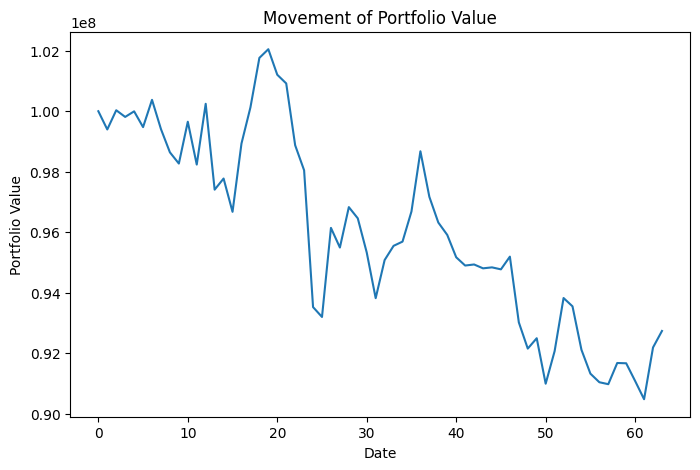

In [375]:
# Plot both columns on the same graph
daily_price['Portfolio Value'].plot(figsize=(8, 5), title= "Movement of Portfolio Value")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.show()